# Part I - Airline Delay Cause
## by Vamshi Krishna Reddy Singireddy

## Introduction

The dataset is from Depatment of transportation on what were the causes of delays in the flights at various airports by carrier. Below are the fields in the dataset:

year = year of the flight

month = month of flight

carrier = carrier code

carrier_name = name of carrier

airport = airport code

airport_name = name of airport

arr_flights = number of flights arrived into airport

arr_del15 = number of flights arrived that got delayed for more than 15 mins

carrier_ct = number of flights that arrived late got delayed due to carrier

weather_ct = number of flights that arrived late due to weather

nas_ct = number of flights delayed due to heavy air traffic

security_ct = number of flights delayed due to security

late_aircraft_ct = number of flight delayed due to another flight of same aircraft delayed

arr_cancelled = number of flights canceled

arr_diverted = number of flights diverted

arr_delay = total time of delayed flight

carrier_delay = total time of delay due to carrier

weather_delay = total time due to weather

nas_delay = total delay due to heavy traffic

security_delay = total time due to security

late_aircraft_delay = total time due to delay caused by previous flight of same airplane arriving






## Preliminary Wrangling


In [109]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [110]:
delay_cause = pd.read_csv('Airline_Delay_Cause.csv')

In [111]:
delay_cause.head(10)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,4,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",85.0,7.0,3.00,0.00,...,0.0,0.92,0.0,2.0,428.0,250.0,0.0,87.0,0.0,91.0
1,2023,4,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",46.0,5.0,3.63,0.61,...,0.0,0.00,0.0,1.0,272.0,153.0,67.0,52.0,0.0,0.0
2,2023,4,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",61.0,5.0,0.68,0.07,...,0.0,0.93,0.0,1.0,204.0,36.0,2.0,141.0,0.0,25.0
3,2023,4,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",211.0,29.0,9.86,1.00,...,0.0,13.93,1.0,0.0,1346.0,384.0,39.0,115.0,0.0,808.0
4,2023,4,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1390.0,140.0,41.20,5.11,...,0.0,64.59,0.0,2.0,12486.0,4655.0,403.0,1190.0,0.0,6238.0
5,2023,4,9E,Endeavor Air Inc.,ATW,"Appleton, WI: Appleton International",17.0,3.0,2.89,0.00,...,0.0,0.00,0.0,0.0,273.0,255.0,0.0,18.0,0.0,0.0
6,2023,4,9E,Endeavor Air Inc.,AUS,"Austin, TX: Austin - Bergstrom International",51.0,8.0,2.91,0.00,...,0.0,0.00,0.0,0.0,297.0,180.0,0.0,117.0,0.0,0.0
7,2023,4,9E,Endeavor Air Inc.,AVL,"Asheville, NC: Asheville Regional",56.0,9.0,3.47,0.00,...,0.0,4.54,0.0,0.0,712.0,288.0,0.0,38.0,0.0,386.0
8,2023,4,9E,Endeavor Air Inc.,AZO,"Kalamazoo, MI: Kalamazoo/Battle Creek Internat...",60.0,4.0,1.88,0.00,...,0.0,1.12,0.0,0.0,359.0,124.0,0.0,81.0,0.0,154.0
9,2023,4,9E,Endeavor Air Inc.,BDL,"Hartford, CT: Bradley International",75.0,9.0,4.21,0.00,...,0.0,3.61,0.0,0.0,404.0,87.0,0.0,61.0,0.0,256.0


In [112]:
delay_cause.shape

(339106, 21)

339,106 records in the dataset.

In [113]:
delay_cause.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339106 entries, 0 to 339105
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 339106 non-null  int64  
 1   month                339106 non-null  int64  
 2   carrier              339106 non-null  object 
 3   carrier_name         339106 non-null  object 
 4   airport              339106 non-null  object 
 5   airport_name         339106 non-null  object 
 6   arr_flights          338609 non-null  float64
 7   arr_del15            338371 non-null  float64
 8   carrier_ct           338609 non-null  float64
 9   weather_ct           338609 non-null  float64
 10  nas_ct               338609 non-null  float64
 11  security_ct          338609 non-null  float64
 12  late_aircraft_ct     338609 non-null  float64
 13  arr_cancelled        338609 non-null  float64
 14  arr_diverted         338609 non-null  float64
 15  arr_delay        

Data is missing in few columns. We will try to derive the missing records where possible

The month in the dataset is a number. To make it more readable in the charts later, I have created a field with month name. 

In [114]:
#https://pynative.com/python-get-month-name-from-number/
from datetime import datetime
import calendar
delay_cause['month_name']= delay_cause['month'].apply(lambda x: calendar.month_name[x])


In [115]:
delay_cause['month_name'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 339106 entries, 0 to 339105
Series name: month_name
Non-Null Count   Dtype 
--------------   ----- 
339106 non-null  object
dtypes: object(1)
memory usage: 2.6+ MB


Month name from above code is a string. With a string it is sometimes possible that the order of the categorical variable in the chart may not be as desired. For that reason we are converting it to a categorical datatype in the below cell.

In [116]:
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

mclasses = pd.api.types.CategoricalDtype(ordered=True, categories=month_order)

delay_cause['month_name'] = delay_cause['month_name'].astype(mclasses);

In the below code we are verifying that the data type of month_name is changed to category

In [117]:
delay_cause.month_name.info()

<class 'pandas.core.series.Series'>
RangeIndex: 339106 entries, 0 to 339105
Series name: month_name
Non-Null Count   Dtype   
--------------   -----   
339106 non-null  category
dtypes: category(1)
memory usage: 331.7 KB


It was observed that the airport name in the original dataset has both city and airport name. I have splitted the airport name in original dataset into city and airport_name_exlu for further analysis to see if there is a relation between city and weather.

In [118]:
#https://stackoverflow.com/questions/37333299/splitting-a-pandas-dataframe-column-by-delimiter

delay_cause[['city','airport_name_excl']] = delay_cause['airport_name'].str.split(':', expand=True)

Verifying below that the airportname in the original dataset is split

In [119]:
delay_cause.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,month_name,city,airport_name_excl
0,2023,4,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",85.0,7.0,3.00,0.00,...,2.0,428.0,250.0,0.0,87.0,0.0,91.0,April,"Albany, GA",Southwest Georgia Regional
1,2023,4,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",46.0,5.0,3.63,0.61,...,1.0,272.0,153.0,67.0,52.0,0.0,0.0,April,"Alexandria, LA",Alexandria International
2,2023,4,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",61.0,5.0,0.68,0.07,...,1.0,204.0,36.0,2.0,141.0,0.0,25.0,April,"Augusta, GA",Augusta Regional at Bush Field
3,2023,4,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",211.0,29.0,9.86,1.00,...,0.0,1346.0,384.0,39.0,115.0,0.0,808.0,April,"Albany, NY",Albany International
4,2023,4,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1390.0,140.0,41.20,5.11,...,2.0,12486.0,4655.0,403.0,1190.0,0.0,6238.0,April,"Atlanta, GA",Hartsfield-Jackson Atlanta International


Few records have null values in the arr_del15 column. arr_del15 is observed to the sum of all individual reasons.

In the below code we are recalculating the arr_del15 from the individual reasons into arr_del15_new column.

In [120]:
delay_cause['arr_del15_new'] = delay_cause.carrier_ct + delay_cause.weather_ct + delay_cause.nas_ct + delay_cause.security_ct + delay_cause.late_aircraft_ct

In [121]:
delay_cause.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339106 entries, 0 to 339105
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   year                 339106 non-null  int64   
 1   month                339106 non-null  int64   
 2   carrier              339106 non-null  object  
 3   carrier_name         339106 non-null  object  
 4   airport              339106 non-null  object  
 5   airport_name         339106 non-null  object  
 6   arr_flights          338609 non-null  float64 
 7   arr_del15            338371 non-null  float64 
 8   carrier_ct           338609 non-null  float64 
 9   weather_ct           338609 non-null  float64 
 10  nas_ct               338609 non-null  float64 
 11  security_ct          338609 non-null  float64 
 12  late_aircraft_ct     338609 non-null  float64 
 13  arr_cancelled        338609 non-null  float64 
 14  arr_diverted         338609 non-null  float64 
 15  

From the above code, we acan observe the arr_del15_new has the same number of records(338609) as the individual reasons.

In the below code, we are dropping the original arr_del15 columns which was missing records from the dataframe.

In [122]:
delay_cause = delay_cause.drop(['arr_del15'],axis=1)

Ratio of total flights later than 15 minutes to overall flights arrived

In [123]:
delay_cause['arr_del15_ratio'] = delay_cause['arr_del15_new']/delay_cause['arr_flights']

It would be interesting to calculate the ratio of diverted and canceled flights to overall flights arrived. We are deriving them in the below cells.

In [124]:
delay_cause['arr_cancelled_ratio'] = delay_cause['arr_cancelled']/delay_cause['arr_flights']

In [125]:
delay_cause['arr_diverted_ratio'] = delay_cause['arr_diverted']/delay_cause['arr_flights']

In [126]:
delay_cause.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339106 entries, 0 to 339105
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   year                 339106 non-null  int64   
 1   month                339106 non-null  int64   
 2   carrier              339106 non-null  object  
 3   carrier_name         339106 non-null  object  
 4   airport              339106 non-null  object  
 5   airport_name         339106 non-null  object  
 6   arr_flights          338609 non-null  float64 
 7   carrier_ct           338609 non-null  float64 
 8   weather_ct           338609 non-null  float64 
 9   nas_ct               338609 non-null  float64 
 10  security_ct          338609 non-null  float64 
 11  late_aircraft_ct     338609 non-null  float64 
 12  arr_cancelled        338609 non-null  float64 
 13  arr_diverted         338609 non-null  float64 
 14  arr_delay            338609 non-null  float64 
 15  

Out of the 339,106 records in the dataset only 338609 records have a delay reason. As it is not possible to calculate the number of flights under each reason for delay, we will therefore drops the records

In [127]:
delay_cause.dropna(subset=['arr_del15_new'], inplace=True)

The number of records in dataset is now 338609 and there are no missing values, which can be observed in below cell

In [128]:
delay_cause.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338609 entries, 0 to 339105
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   year                 338609 non-null  int64   
 1   month                338609 non-null  int64   
 2   carrier              338609 non-null  object  
 3   carrier_name         338609 non-null  object  
 4   airport              338609 non-null  object  
 5   airport_name         338609 non-null  object  
 6   arr_flights          338609 non-null  float64 
 7   carrier_ct           338609 non-null  float64 
 8   weather_ct           338609 non-null  float64 
 9   nas_ct               338609 non-null  float64 
 10  security_ct          338609 non-null  float64 
 11  late_aircraft_ct     338609 non-null  float64 
 12  arr_cancelled        338609 non-null  float64 
 13  arr_diverted         338609 non-null  float64 
 14  arr_delay            338609 non-null  float64 
 15  

### What is the structure of your dataset?

The original dataset had 339106 rows and 21 columns. After dropping few missing records and deriving few columns, we have 338609 records and 26 columns.


### What is/are the main feature(s) of interest in your dataset?

The main features of interest in the dataset are:

year

month_name

carrier

airport

arr_flights

arr_del15

carrier_ct

weather_ct

nas_ct

security_ct

late_aircraft_ct

arr_delay

carrier_delay

nas_delay

late_aircraft_delay

weather_delay

arr_cancelled

arr_diverted



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

airport

carrier_name

year

month_name

weather_ct

nas_ct

security_ct

carrier_ct

late_aircraft_ct

arr_flights

arr_delay15

weather_delay

carrier_delay

nas_delay

late_aircraft_delay

## Univariate Exploration

 


In [129]:
delay_cause.describe()

,year,month,arr_flights,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,arr_del15_new,arr_del15_ratio,arr_cancelled_ratio,arr_diverted_ratio
count,338609.000000,338609.000000,338609.000000,338609.000000,338609.000000,338609.000000,338609.000000,338609.000000,338609.000000,338609.000000,338609.00000,338609.000000,338609.000000,338609.000000,338609.000000,338609.000000,338609.000000,338609.000000,338609.000000,338609.000000
mean,2013.026966,6.492122,378.904052,21.261839,2.618377,23.628478,0.180072,24.970208,7.225582,0.865450,4242.67106,1315.120558,224.179221,1084.766300,7.361523,1611.241323,72.658973,0.198259,0.021593,0.003175
std,5.949555,3.460092,1020.933002,48.455239,9.890233,83.541092,0.848713,75.346205,36.956561,3.890923,12613.70839,3643.134995,869.753785,4547.465816,39.977372,4992.016009,198.115015,0.112278,0.053575,0.024350
min,2003.000000,1.000000,1.000000,0.000000,0.000000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.000000,3.000000,58.000000,3.000000,0.000000,1.610000,0.000000,1.640000,0.000000,0.000000,435.00000,148.000000,0.000000,54.000000,0.000000,79.000000,9.000000,0.123264,0.000000,0.000000
50%,2013.000000,7.000000,120.000000,8.140000,0.590000,5.370000,0.000000,5.840000,1.000000,0.000000,1200.00000,437.000000,25.000000,199.000000,0.000000,352.000000,22.000000,0.185484,0.006494,0.000000
75%,2019.000000,9.000000,270.000000,19.670000,2.000000,15.100000,0.000000,17.000000,4.000000,1.000000,3085.00000,1110.000000,161.000000,594.000000,0.000000,1115.000000,55.010000,0.258065,0.024345,0.001194
max,2023.000000,12.000000,21977.000000,1792.070000,717.940000,4091.270000,80.560000,1885.470000,4951.000000,256.000000,433687.00000,196944.000000,57707.000000,238440.000000,3760.000000,158653.000000,6377.000000,1.010000,1.000000,1.000000


The year in the dataset ranges from 2003 to 2023

It appears that the max number of flights in one of the record is 21,997 which seems to be an outlier or something to look closely. 

### How are flights delayed by more than 15 minutes late distributed?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


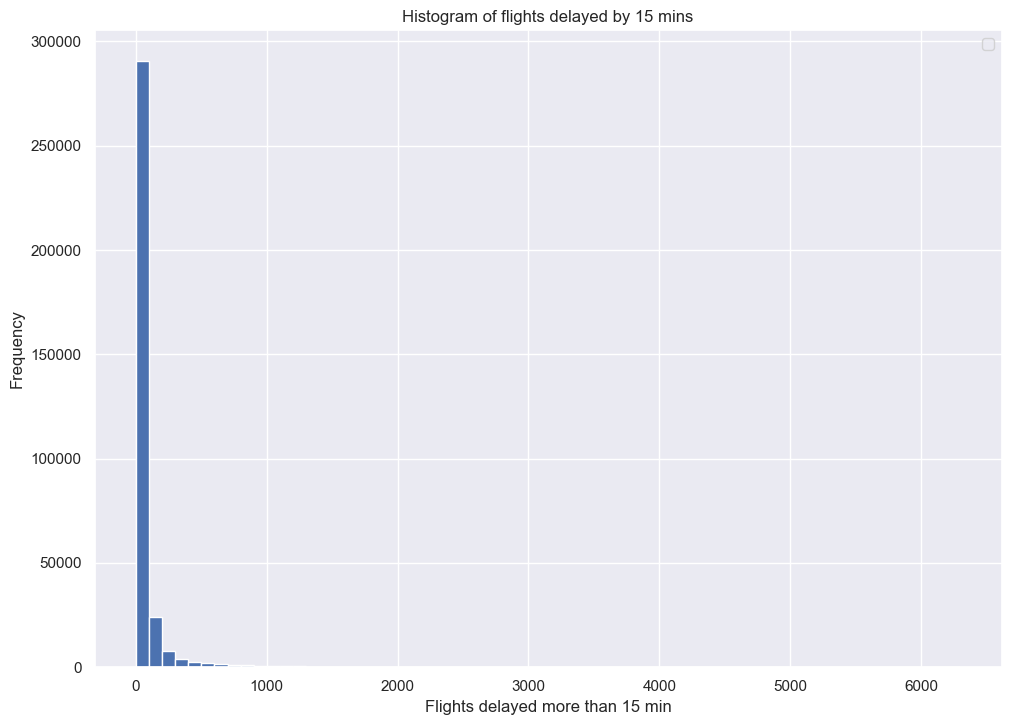

In [130]:
#https://stackoverflow.com/questions/19614400/add-title-to-collection-of-pandas-hist-plots
#https://www.w3schools.com/python/matplotlib_labels.asp

bins = np.arange(0, delay_cause['arr_del15_new'].max()+5, 100)
plt.hist(data = delay_cause, x = 'arr_del15_new', bins = bins)
plt.title('Histogram of flights delayed by 15 mins');
plt.xlabel('Flights delayed more than 15 min')
plt.ylabel('Frequency')
plt.legend();


The data is skewed to the right. I am therfore checking the descroptive statistics for the feature.

In [131]:
delay_cause['arr_del15_new'].describe()

count    338609.000000
mean         72.658973
std         198.115015
min           0.000000
25%           9.000000
50%          22.000000
75%          55.010000
max        6377.000000
Name: arr_del15_new, dtype: float64

The descripted statistics also suggest that the data is skewed to the right. We will calculate the IQR to identify outliers in below cell.

IQR = Q1 - Q3 is 55 - 9 = 46

Q3 +1.5IQR is 55 + 46*1.5 = 124

values above 124 may be outliers

we are limiting the x-axis to 125 to observe the distrubtion where majority of the data is.

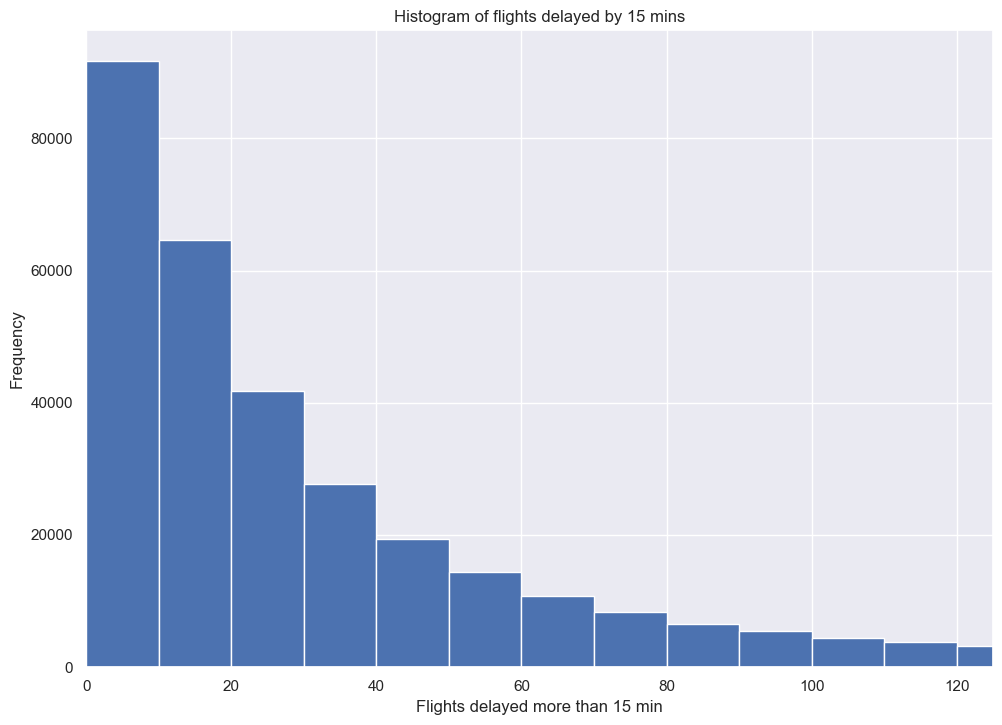

In [132]:
bins = np.arange(0, delay_cause['arr_del15_new'].max()+5, 10)
plt.hist(data = delay_cause, x = 'arr_del15_new', bins = bins);
plt.xlim(0,125)
plt.title('Histogram of flights delayed by 15 mins');
plt.xlabel('Flights delayed more than 15 min')
plt.ylabel('Frequency');


### How are arrived flights distributed in the dataset?

I am checking the descriptive statistics as there was few carriers and airports which have more than 16K flights each month.

In [133]:
delay_cause['arr_flights'].describe()

count    338609.000000
mean        378.904052
std        1020.933002
min           1.000000
25%          58.000000
50%         120.000000
75%         270.000000
max       21977.000000
Name: arr_flights, dtype: float64

I am using IQR for identifying outliers to better observe majoirty of dataset.

IQR = Q1 - Q3
270 - 58 = 212

Q3 +1.5IQR is 270 + 212*1.5 = 588

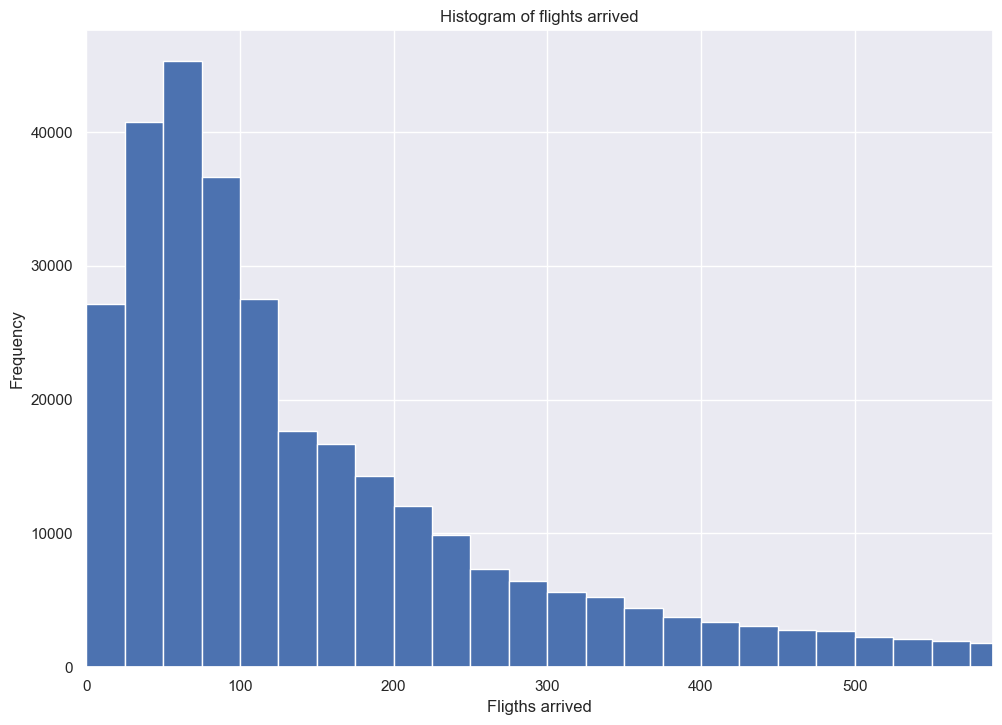

In [134]:
bins = np.arange(0, delay_cause['arr_flights'].max()+5, 25)
plt.hist(data = delay_cause, x = 'arr_flights', bins = bins)
plt.xlim(0,590)
plt.title('Histogram of flights arrived')
plt.xlabel('Fligths arrived')
plt.ylabel('Frequency');

The data is skewed heavity to right. Majority of airports receive less than 270 flights per month by a given carrier

Observing on log scale to see if there is a pattern.

In [135]:
np.log10(delay_cause['arr_flights'].describe())

count    5.529698
mean     2.578529
std      3.008997
min      0.000000
25%      1.763428
50%      2.079181
75%      2.431364
max      4.341968
Name: arr_flights, dtype: float64

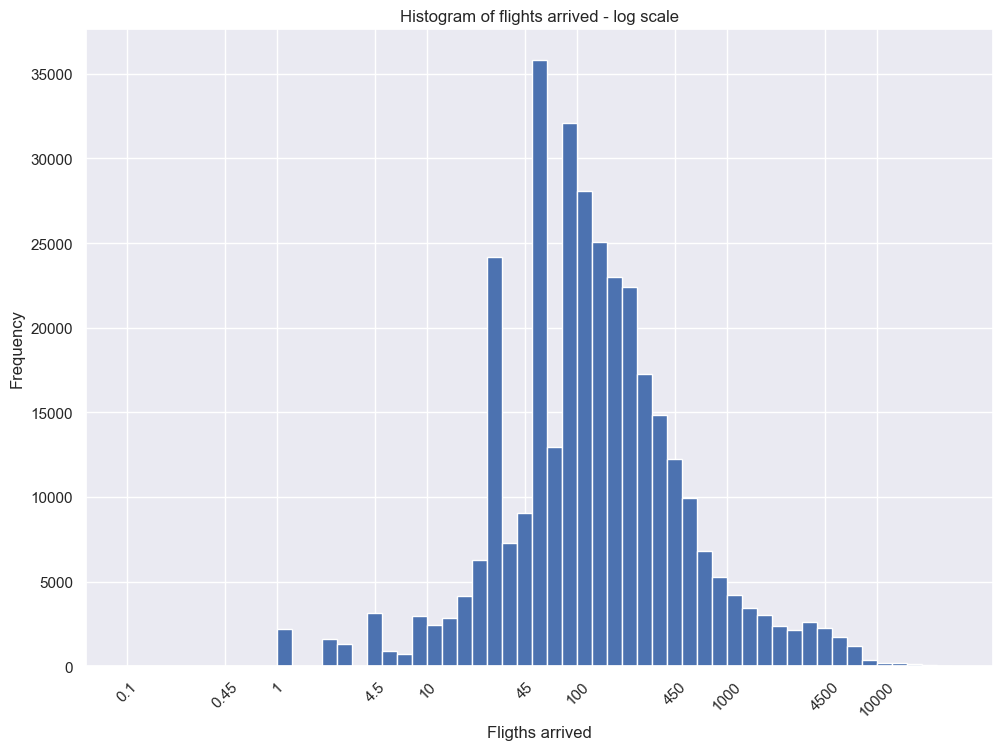

In [136]:
## Axis transformation
## Bin size
bins = 10 ** np.arange(-1, 4.5+0.1, 0.1)

## Generate the x-ticks you want to apply
ticks = [0.1, 0.45, 1, 4.5, 10, 45, 100, 450, 1000,4500,10000]
## Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

plt.hist(data=delay_cause, x='arr_flights', bins=bins)
plt.xscale('log')
## Apply x-ticks
plt.xticks(ticks, labels,rotation =45)
plt.title('Histogram of flights arrived - log scale')
plt.xlabel('Fligths arrived')
plt.ylabel('Frequency');

Even with log distribution, we can see there is multi modal distribution

### Reasons for delay of flights

For this we are creating a bar chart showing number of flights for each reason. As the number of flights that got delayed are in each individual column, I have used pd.melt to a create a new dataframe with reasons and number of flights

In [137]:
melted_delay_cause = pd.melt(delay_cause, id_vars='carrier', value_vars=['carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct'], var_name='reason', value_name='flight_delay_ct')

# Print the melted DataFrame
#print(melted_delay_cause)


In [138]:
melted_delay_cause.query('reason == "weather_ct"').head()

,carrier,reason,flight_delay_ct
338609,9E,weather_ct,0.00
338610,9E,weather_ct,0.61
338611,9E,weather_ct,0.07
338612,9E,weather_ct,1.00
338613,9E,weather_ct,5.11


In the above cell we have verified that the reason and flight_delay_ct columns are created for the dataset

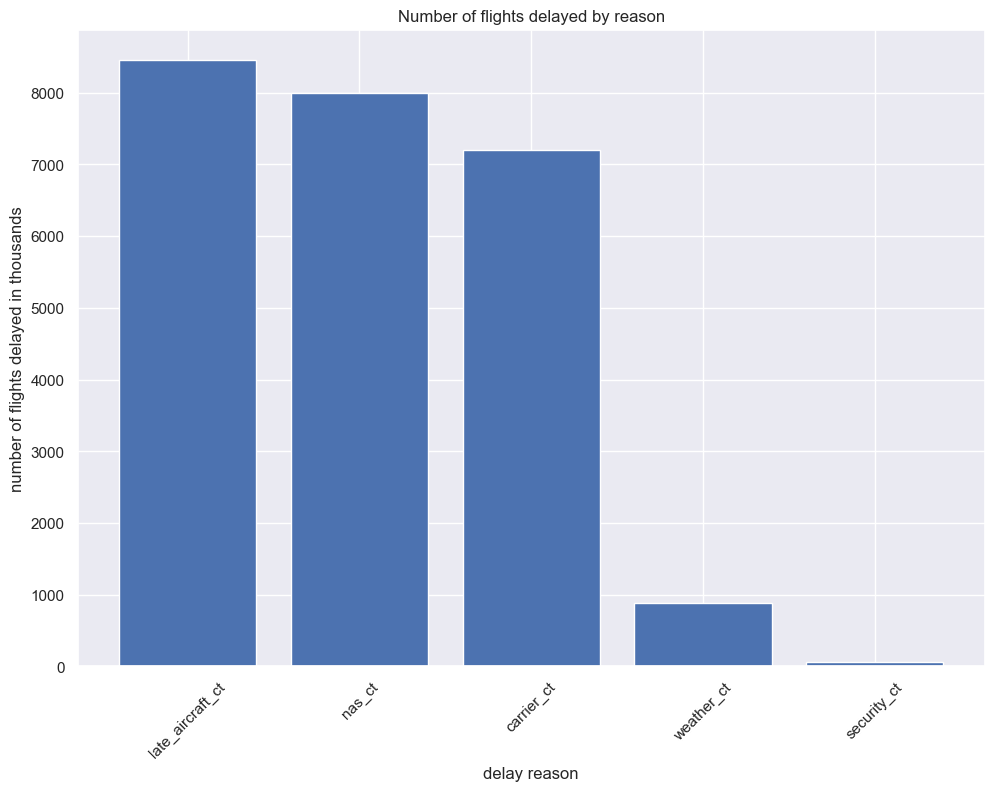

In [139]:
#dividing by thousand to express the large number in thousands
y =  melted_delay_cause.groupby('reason')['flight_delay_ct'].sum()/1000



y_sorted = y.sort_values(ascending=False)

x_sorted = y_sorted.index

plt.bar(x_sorted,y_sorted)

plt.xlabel('delay reason')
plt.ylabel('number of flights delayed in thousands')
plt.title('Number of flights delayed by reason')
plt.xticks(rotation =45)
plt.show()

### Reasons of delay interms of minutes delayed 

For this we are creating a bar chart showing number of minutes delayed for each reason. As the number of minutes the flights that got delayed are in each individual column, I have used pd.melt to a create a new dataframe with reasons and number of minutes

In [140]:
melted_delay_min = pd.melt(delay_cause, id_vars='carrier', value_vars=['carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay'], var_name='reason', value_name='flight_delay_min')



In [141]:
melted_delay_min.query('reason == "weather_delay"').head()

,carrier,reason,flight_delay_min
338609,9E,weather_delay,0.0
338610,9E,weather_delay,67.0
338611,9E,weather_delay,2.0
338612,9E,weather_delay,39.0
338613,9E,weather_delay,403.0


In the above cell we have verified that the reason and flight_delay_min columns are created for the dataset

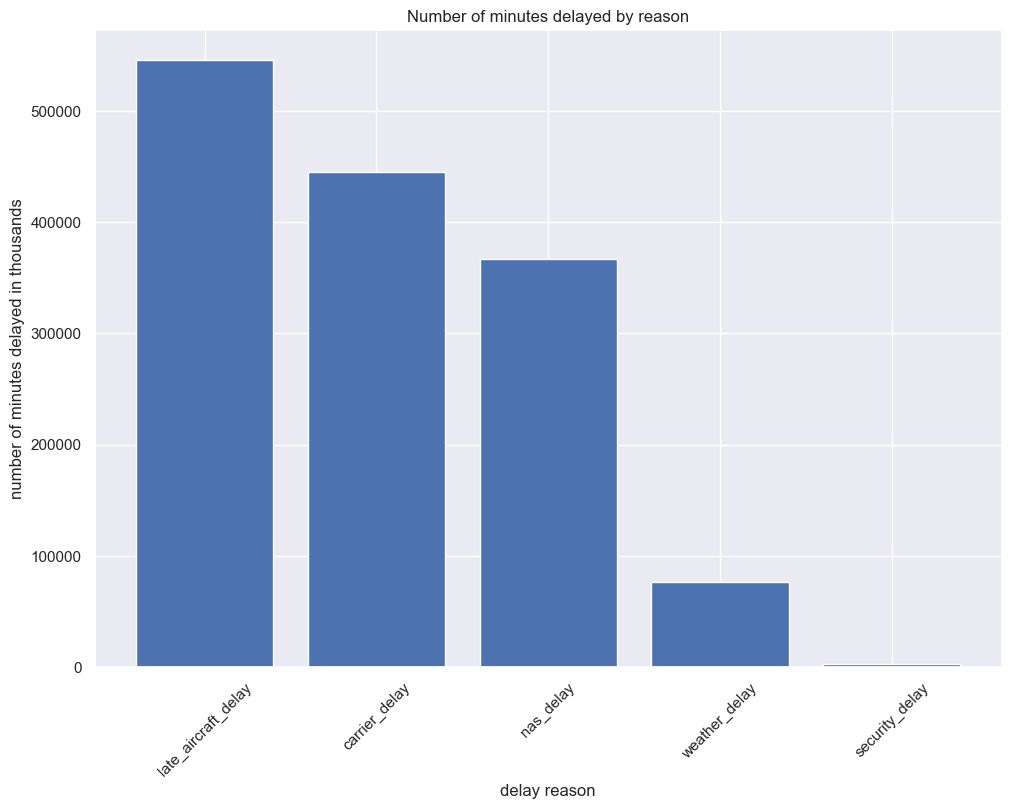

In [142]:
#dividing by thousand to express the large number in thousands
y =  melted_delay_min.groupby('reason')['flight_delay_min'].sum()/1000

y_sorted = y.sort_values(ascending=False)

x_sorted = y_sorted.index

plt.bar(x_sorted,y_sorted)

plt.xlabel('delay reason')
plt.ylabel('number of minutes delayed in thousands')
plt.title('Number of minutes delayed by reason')
plt.xticks(rotation =45)
plt.show()

It is interesting to note that carrier_delay is the 2nd biggest reason for number of minutes delayed, while it is the 3rd biggest reason for delay of flights.

### How are number of flights delayed to weather distributed

For this I am creating a histogram of weather_ct. Before that I wanted to check the descriptive statistics.

In [143]:
delay_cause['weather_ct'].describe()

count    338609.000000
mean          2.618377
std           9.890233
min           0.000000
25%           0.000000
50%           0.590000
75%           2.000000
max         717.940000
Name: weather_ct, dtype: float64

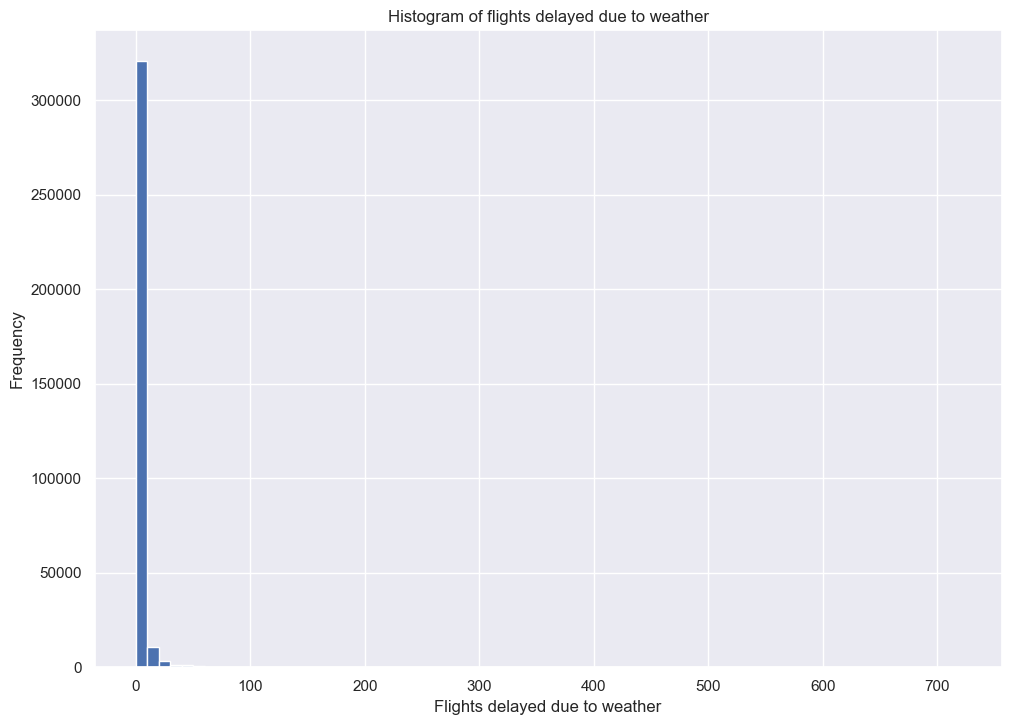

In [144]:
bins = np.arange(0, delay_cause['weather_ct'].max()+5, 10)
plt.hist(data = delay_cause, x = 'weather_ct', bins = bins)
plt.title('Histogram of flights delayed due to weather');
plt.xlabel('Flights delayed due to weather')
plt.ylabel('Frequency');


Weather flight delay is extremely skewed to the right. Also it is also not a major reason for flight delay.

IQR is calculated in below cell to identify outliers.

IQR = Q1 - Q3 is 2-0 = 2

Q3 +1.5IQR is 2 + 2*1.5 = 5

Histogram after assuming anything greater than 5 is an outlier

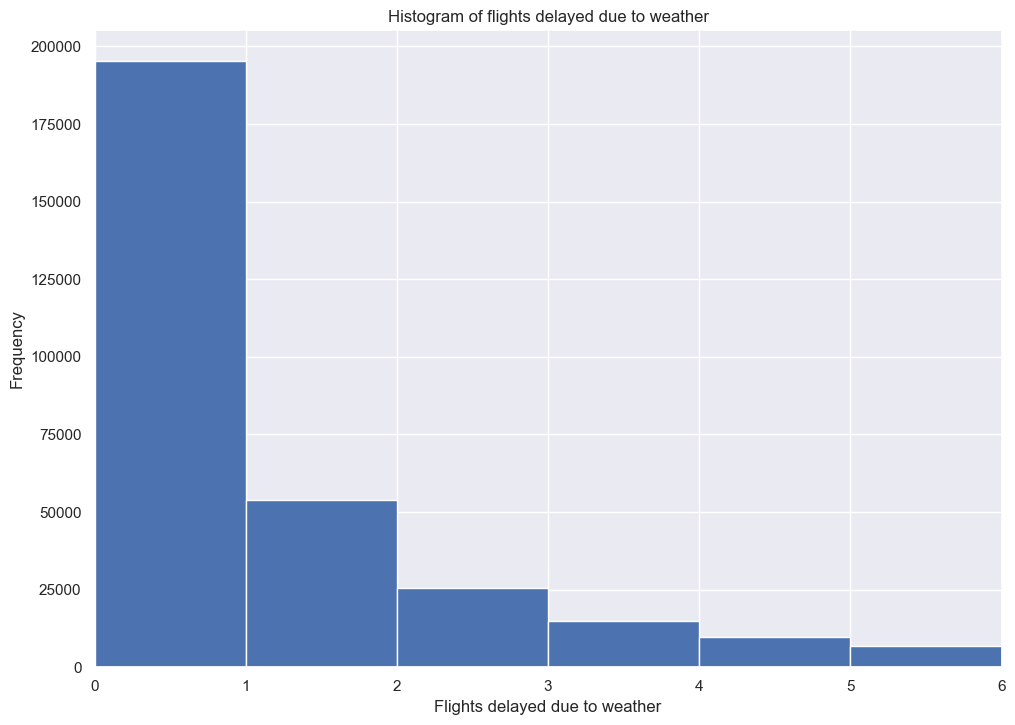

In [145]:
bins = np.arange(0, delay_cause['weather_ct'].max()+1, 1)
plt.hist(data = delay_cause, x = 'weather_ct', bins = bins)
plt.xlim(0,6)
plt.title('Histogram of flights delayed due to weather');
plt.xlabel('Flights delayed due to weather')
plt.ylabel('Frequency');


From the above chart we can observe that not many flights get delayed due to weather

### How are number of flights delayed to National Aviation System (traffic) distributed?

For this I am creating a histogram on nas_ct. I am also checking descriptive statistics in below cell.

In [146]:
delay_cause['nas_ct'].describe()

count    338609.000000
mean         23.628478
std          83.541092
min          -0.010000
25%           1.610000
50%           5.370000
75%          15.100000
max        4091.270000
Name: nas_ct, dtype: float64

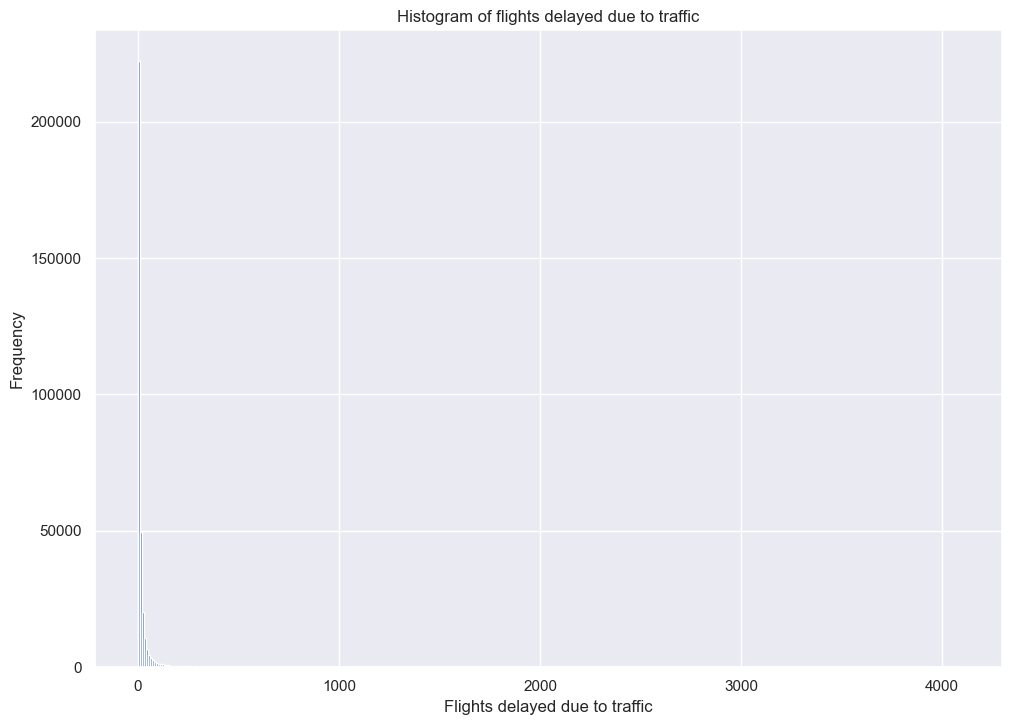

In [147]:
bins = np.arange(-10, delay_cause['nas_ct'].max()+5, 10)
plt.hist(data = delay_cause, x = 'nas_ct', bins = bins)
plt.title('Histogram of flights delayed due to traffic');
plt.xlabel('Flights delayed due to traffic')
plt.ylabel('Frequency');

In the above histogram, we can see that data is skewed to the right. I am calculating IQR to identify outliers.

IQR = Q1 - Q3
IQR is 15.1 - 1.61 = 13.49

Q3 +1.5IQR is 15.1 + 2*13.49 = 42.08

Anything above 42.08 is an outlier. We are therefore limiting the value to 43

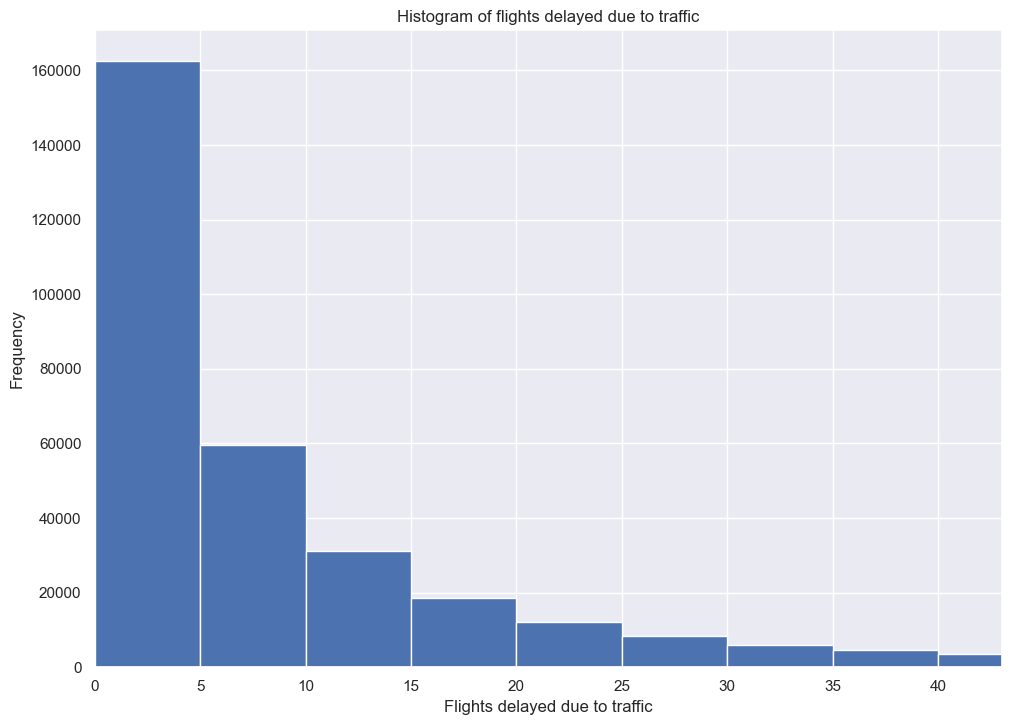

In [148]:
bins = np.arange(0, delay_cause['nas_ct'].max()+1, 5)
plt.hist(data = delay_cause, x = 'nas_ct', bins = bins)
plt.xlim(0,43)
plt.title('Histogram of flights delayed due to traffic');
plt.xlabel('Flights delayed due to traffic')
plt.ylabel('Frequency');

There is significant number of aircraft delayed due to traffic and is skewed to the right

### Distribution of flights delayed due to carrier delay

I am checking descriptive statistics for carrier_ct

In [149]:
delay_cause['carrier_ct'].describe()

count    338609.000000
mean         21.261839
std          48.455239
min           0.000000
25%           3.000000
50%           8.140000
75%          19.670000
max        1792.070000
Name: carrier_ct, dtype: float64

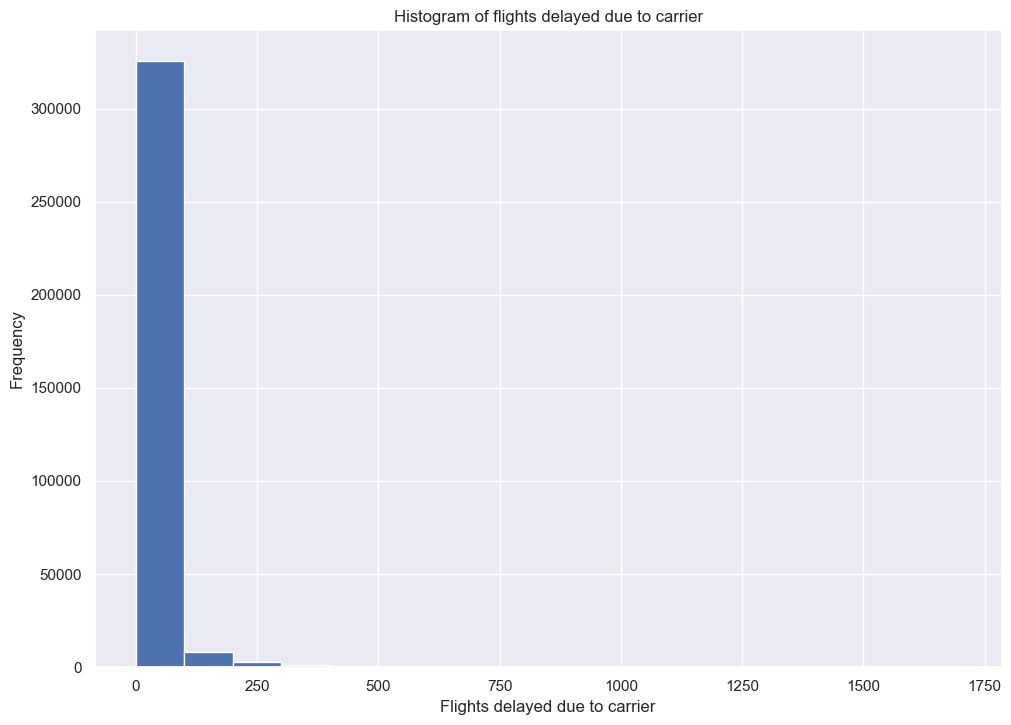

In [150]:
bins = np.arange(0, delay_cause['carrier_ct'].max()+5, 100)
plt.hist(data = delay_cause, x = 'carrier_ct', bins = bins)
plt.title('Histogram of flights delayed due to carrier');
plt.xlabel('Flights delayed due to carrier')
plt.ylabel('Frequency');

The above chart is skewed to the right

IQR = Q1 - Q3
IQR is 19.67 - 3 = 16.67

Q3 +1.5IQR is 19.67 + 2*16.67 = 53.01

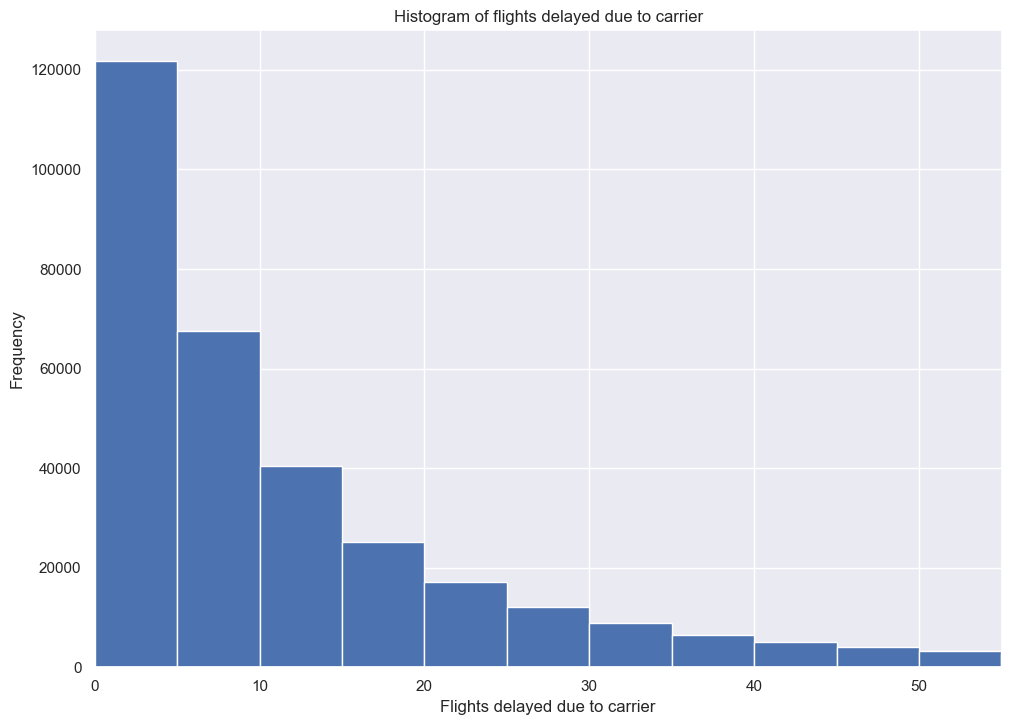

In [151]:
bins = np.arange(0, delay_cause['carrier_ct'].max()+1, 5)
plt.hist(data = delay_cause, x = 'carrier_ct', bins = bins)
plt.xlim(0,55)
plt.title('Histogram of flights delayed due to carrier');
plt.xlabel('Flights delayed due to carrier')
plt.ylabel('Frequency');

From the above distribution we can observe there are many flights delayed due to carrier and is skewed to the right.

### Distribution of flights delayed due to security

we are first checking the descriptive statistics

In [152]:
delay_cause['security_ct'].describe()

count    338609.000000
mean          0.180072
std           0.848713
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          80.560000
Name: security_ct, dtype: float64

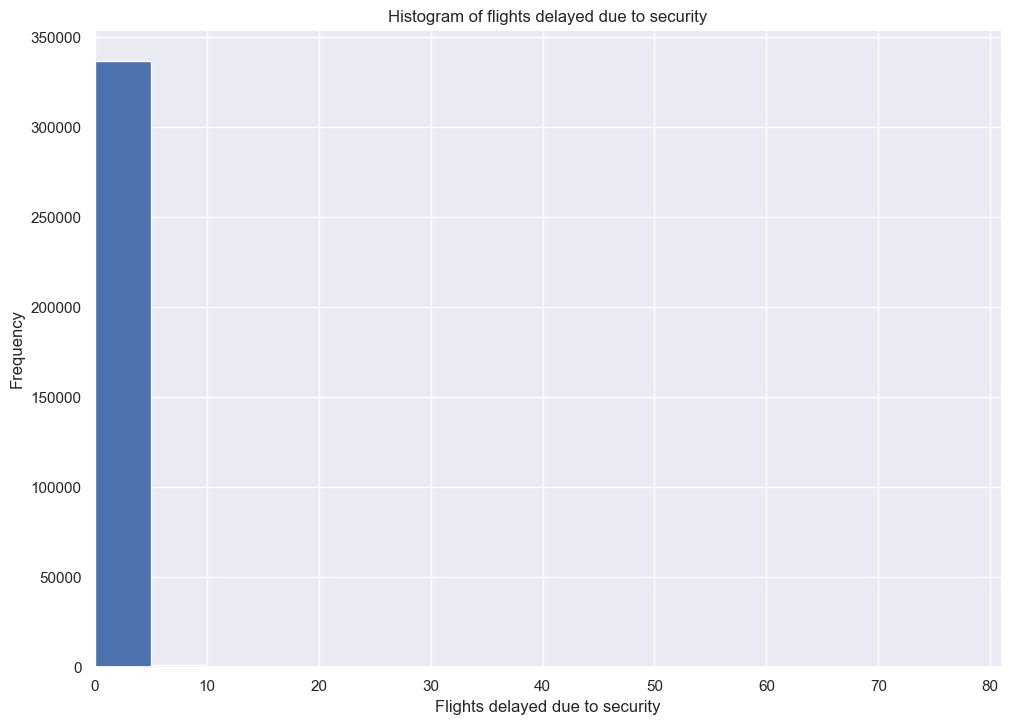

In [153]:
bins = np.arange(0, delay_cause['security_ct'].max()+1, 5)
plt.hist(data = delay_cause, x = 'security_ct', bins = bins)
plt.xlim(0,81)
plt.title('Histogram of flights delayed due to security');
plt.xlabel('Flights delayed due to security')
plt.ylabel('Frequency');

security_ct is extremely skewed to the right

### Distribution of flights delayed due to late_aircraft_ct

we are checking the descriptive statistics for late_aircraft_ct before plotting the histogram.

In [154]:
delay_cause['late_aircraft_ct'].describe()

count    338609.000000
mean         24.970208
std          75.346205
min           0.000000
25%           1.640000
50%           5.840000
75%          17.000000
max        1885.470000
Name: late_aircraft_ct, dtype: float64

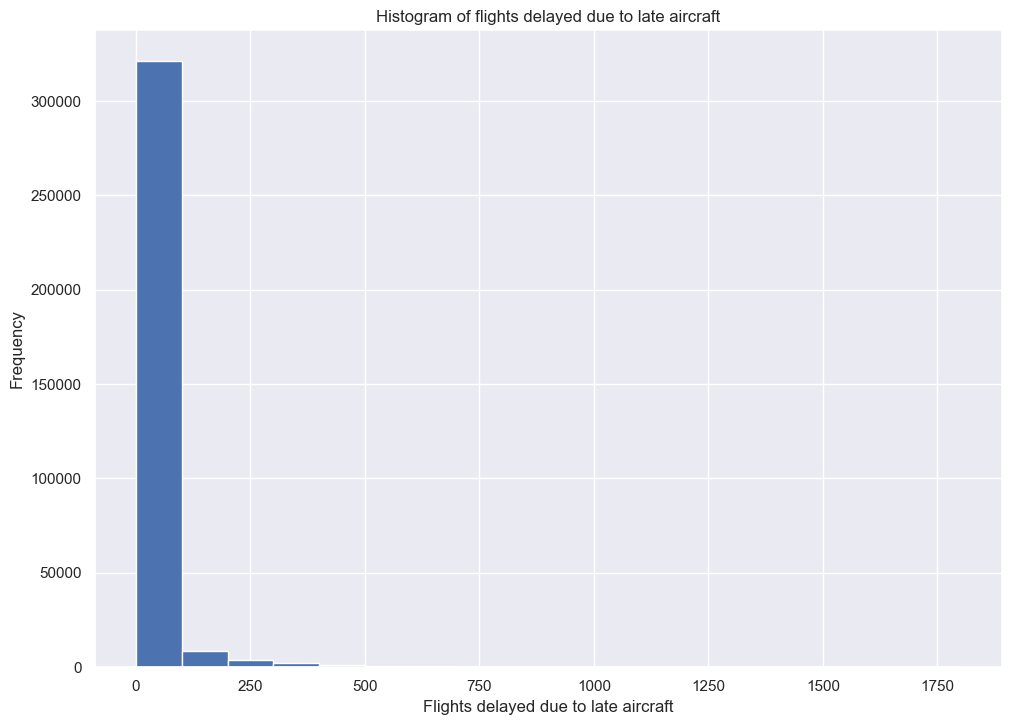

In [155]:
bins = np.arange(0, delay_cause['late_aircraft_ct'].max()+5, 100)
plt.hist(data = delay_cause, x = 'late_aircraft_ct', bins = bins)
plt.title('Histogram of flights delayed due to late aircraft');
plt.xlabel('Flights delayed due to late aircraft')
plt.ylabel('Frequency');

From the above distribtution data is skewed to the right. We are calculating the IQR to identify outliers.

IQR = Q1 - Q3
IQR is 17 - 1.64 = 16.67

Q3 +1.5IQR is 17 + 2*15.36 = 47.72

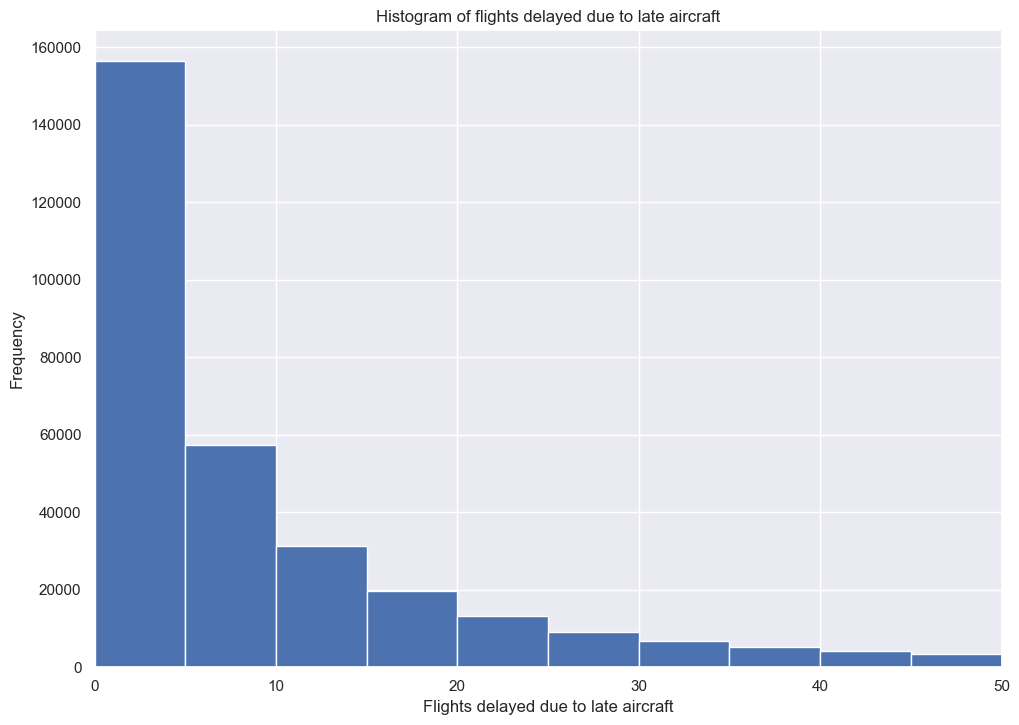

In [156]:
bins = np.arange(0, delay_cause['late_aircraft_ct'].max()+1, 5)
plt.hist(data = delay_cause, x = 'late_aircraft_ct', bins = bins)
plt.xlim(0,50)
plt.title('Histogram of flights delayed due to late aircraft');
plt.xlabel('Flights delayed due to late aircraft')
plt.ylabel('Frequency');

From the above distribution we can observe that many aircraft got delayed to late aircraft

### Distribution of minutes delayed due to carrier

I am checking the descriptive statistics before creating the histogram for carrier_delay

In [157]:
delay_cause['carrier_delay'].describe()

count    338609.000000
mean       1315.120558
std        3643.134995
min           0.000000
25%         148.000000
50%         437.000000
75%        1110.000000
max      196944.000000
Name: carrier_delay, dtype: float64

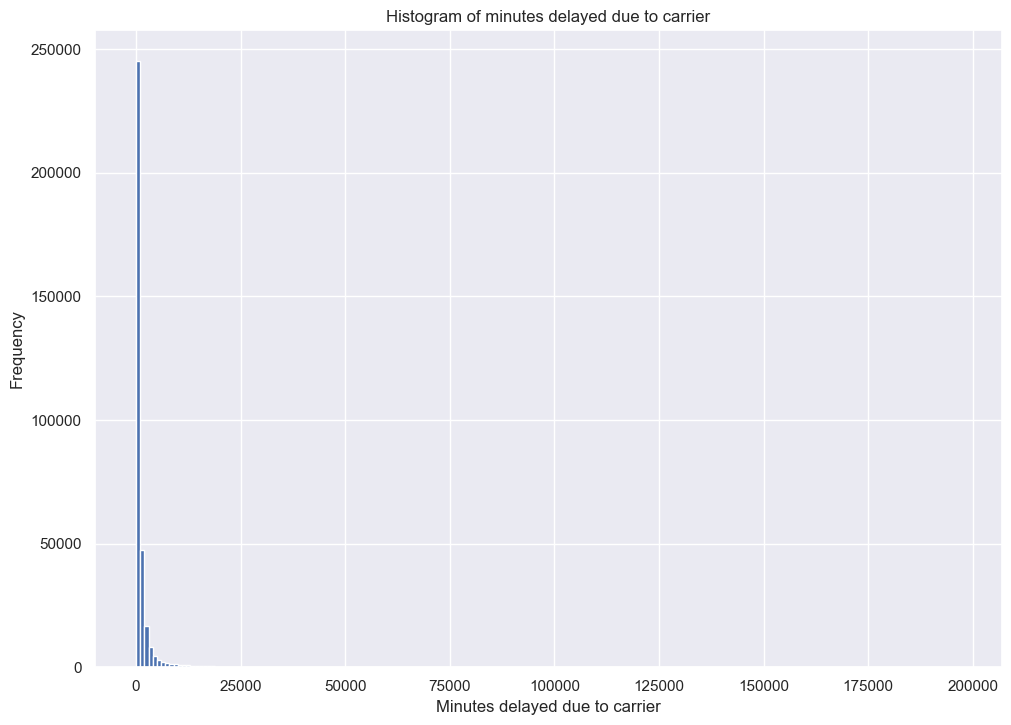

In [158]:
bins = np.arange(0, delay_cause['carrier_delay'].max()+1000, 1000)
plt.hist(data = delay_cause, x = 'carrier_delay', bins = bins)
plt.title('Histogram of minutes delayed due to carrier');
plt.xlabel('Minutes delayed due to carrier')
plt.ylabel('Frequency');

From the above distribution we can observe that is right skewed. I have calculated IQR below to identify outliers.

IQR = 1110 - 148 = 962
Q3 +1.5IQR is 1110 + 1.5*962 = 2553

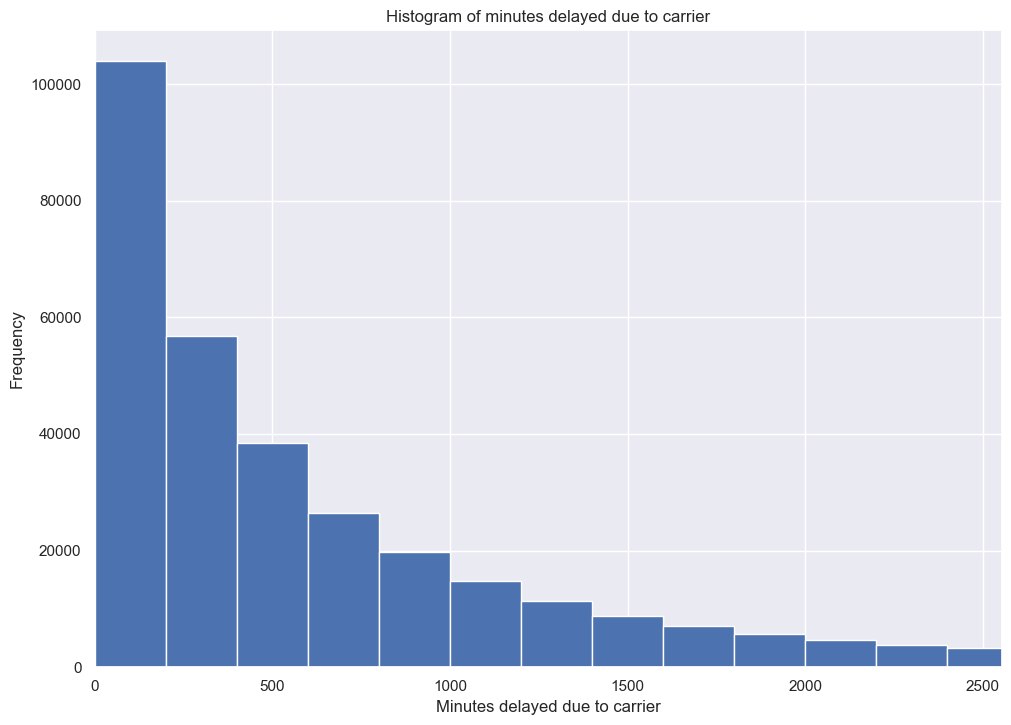

In [159]:
bins = np.arange(0, delay_cause['carrier_delay'].max()+100, 200)
plt.hist(data = delay_cause, x = 'carrier_delay', bins = bins)
plt.xlim((0,2553))
plt.title('Histogram of minutes delayed due to carrier');
plt.xlabel('Minutes delayed due to carrier')
plt.ylabel('Frequency');

From above distribution we have significant amount of delay due to carrier

### Distribution for weather_delay

I am checking descriptive statistics before plotting the histogram of weather_delay

In [160]:
delay_cause['weather_delay'].describe()

count    338609.000000
mean        224.179221
std         869.753785
min           0.000000
25%           0.000000
50%          25.000000
75%         161.000000
max       57707.000000
Name: weather_delay, dtype: float64

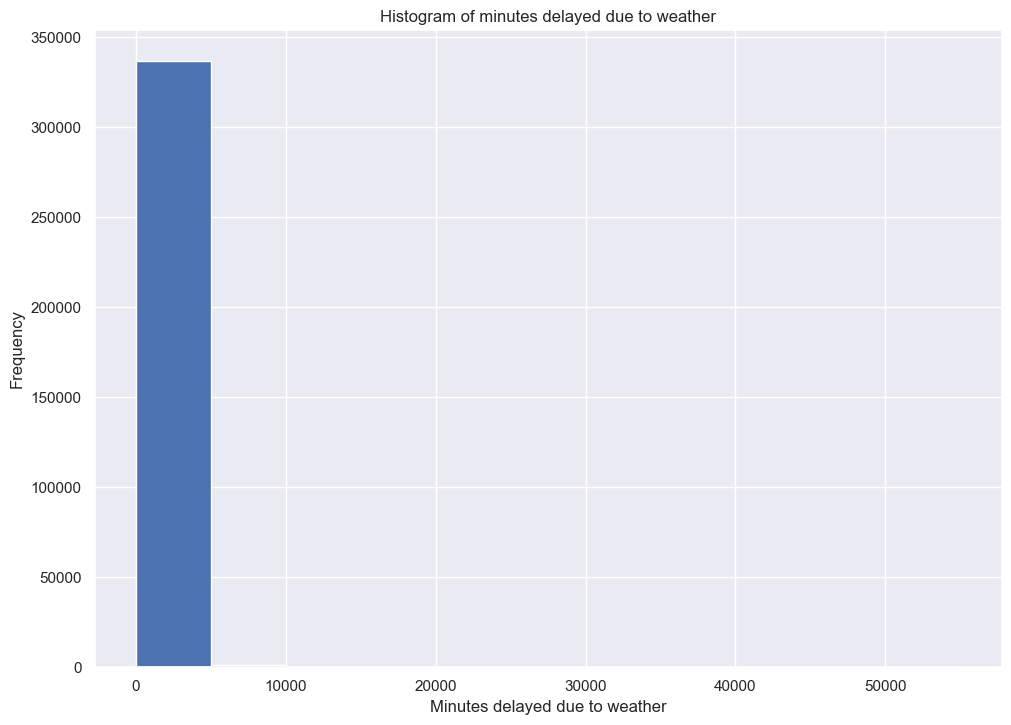

In [161]:
bins = np.arange(0, delay_cause['weather_delay'].max()+1000, 5000)
plt.hist(data = delay_cause, x = 'weather_delay', bins = bins)
plt.title('Histogram of minutes delayed due to weather')
plt.xlabel('Minutes delayed due to weather')
plt.ylabel('Frequency');

From above histogram we can see the data is right skewed. I am calculating IQR to identify outliers

IQR = 161 - 0 = 161
Q3 +1.5IQR is 161 + 1.5*161 = 402.5

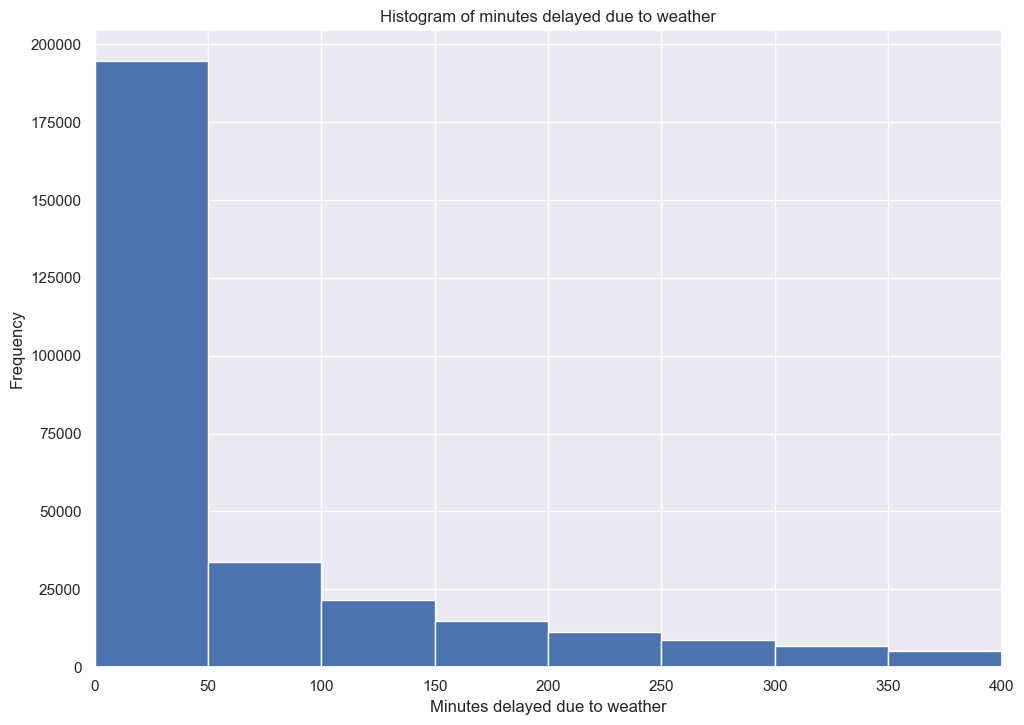

In [162]:
bins = np.arange(0, delay_cause['weather_delay'].max()+10, 50)
plt.hist(data = delay_cause, x = 'weather_delay', bins = bins)
plt.xlim((0,400))
plt.title('Histogram of minutes delayed due to weather')
plt.xlabel('Minutes delayed due to weather')
plt.ylabel('Frequency');

From above charts we can see that minutes delayed to weather is not significant

### Distribution of minutes delayed due to National Aviation System (traffic)

I am checking the descriptive statistics before plotting histogram of nas_delay

In [163]:
delay_cause.nas_delay.describe()

count    338609.000000
mean       1084.766300
std        4547.465816
min         -19.000000
25%          54.000000
50%         199.000000
75%         594.000000
max      238440.000000
Name: nas_delay, dtype: float64

Few flights have negative delay, which is impossible. This will need to be cleaned later.

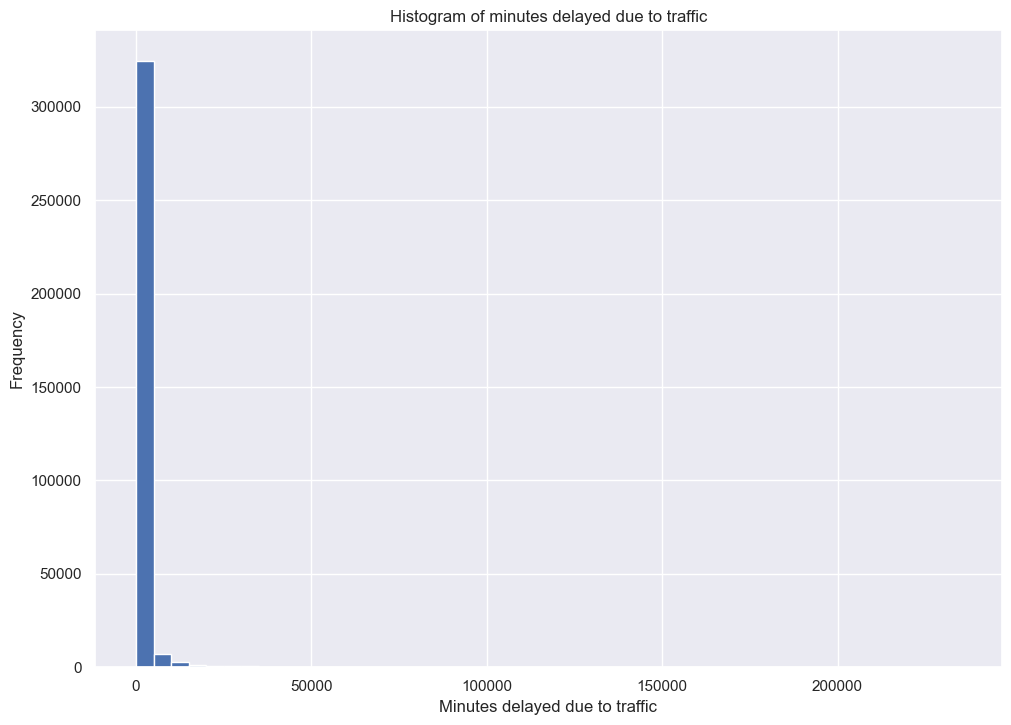

In [164]:
bins = np.arange(0, delay_cause['nas_delay'].max()+1000, 5000)
plt.hist(data = delay_cause, x = 'nas_delay', bins = bins)
plt.title('Histogram of minutes delayed due to traffic');
plt.xlabel('Minutes delayed due to traffic')
plt.ylabel('Frequency');

In the above nas_delay is skewed to right. I am calculating IQR to identify outliers.

IQR = 594 - 54 = 540
Q3+ 1.5 IQR = 594 + 1.5* 540 = 1404

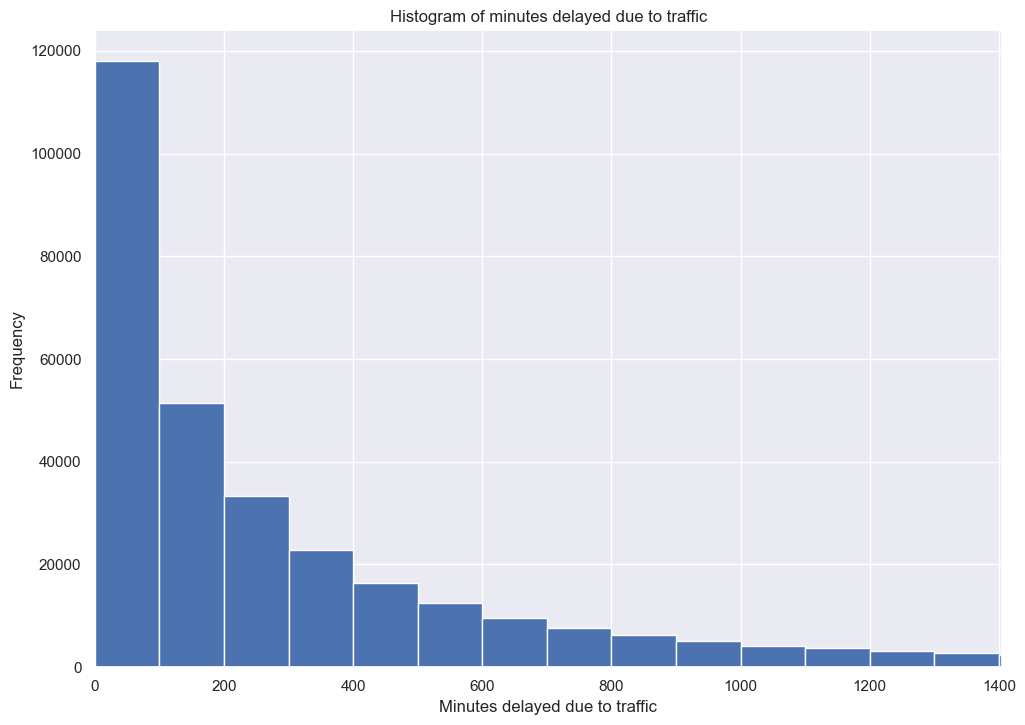

In [165]:
bins = np.arange(0, delay_cause['nas_delay'].max()+10, 100)
plt.hist(data = delay_cause, x = 'nas_delay', bins = bins)
plt.xlim((0,1404))
plt.title('Histogram of minutes delayed due to traffic')
plt.xlabel('Minutes delayed due to traffic')
plt.ylabel('Frequency');

### Distribution of minutes delayed due to security

I am checking descriptive statistics before plotting the histogram of security_delay

In [166]:
delay_cause.security_delay.describe()

count    338609.000000
mean          7.361523
std          39.977372
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        3760.000000
Name: security_delay, dtype: float64

Data is extremely right skewed and may be insignificant

### Distribution of late_aircraft_delay

I am checking descriptive statistics before plotting the histogram of late_aircraft_delay

In [167]:
delay_cause.late_aircraft_delay.describe()

count    338609.000000
mean       1611.241323
std        4992.016009
min           0.000000
25%          79.000000
50%         352.000000
75%        1115.000000
max      158653.000000
Name: late_aircraft_delay, dtype: float64

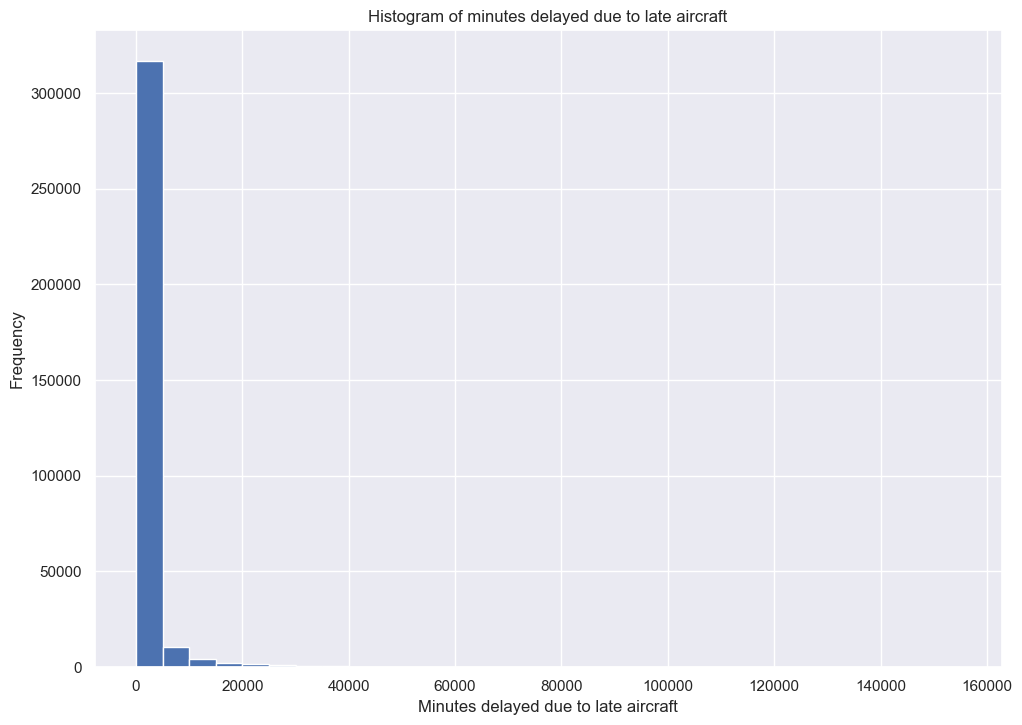

In [168]:
bins = np.arange(0, delay_cause['late_aircraft_delay'].max()+1000, 5000)
plt.hist(data = delay_cause, x = 'late_aircraft_delay', bins = bins)
plt.title('Histogram of minutes delayed due to late aircraft')
plt.xlabel('Minutes delayed due to late aircraft')
plt.ylabel('Frequency');

Data is skewed to right. I am calculating IQR to identify outliers.

IQR = Q3 - Q1 = 1115 -79 = 1036

Q3 + 1.5 IQR = 1115 + 1.5 * 1036 = 2669

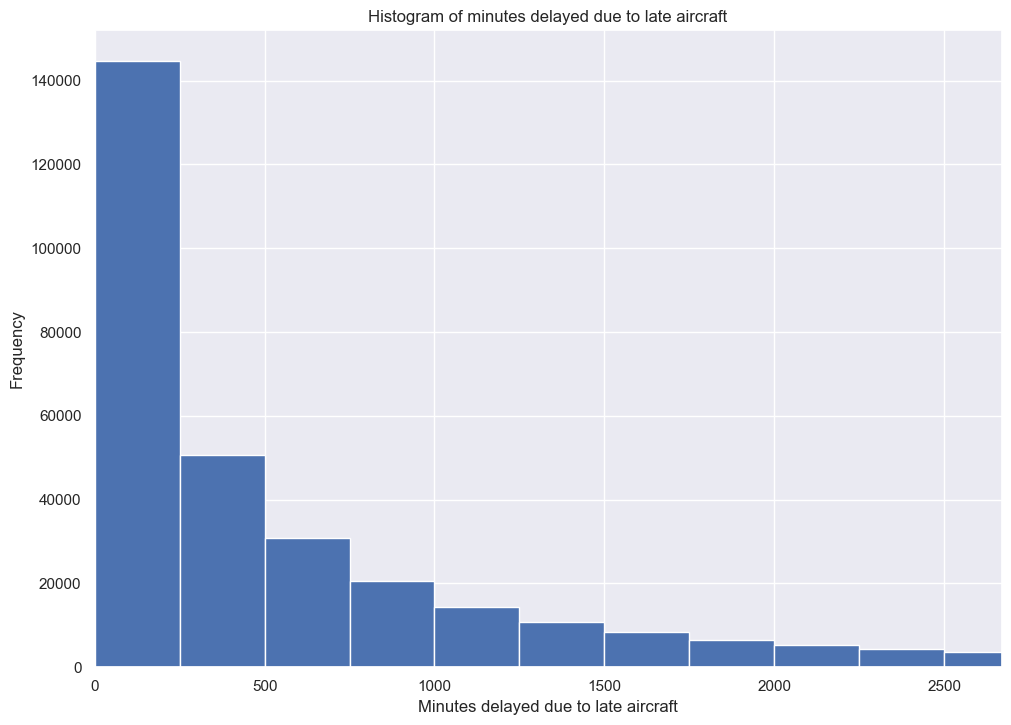

In [169]:
bins = np.arange(0, delay_cause['late_aircraft_delay'].max()+10, 250)
plt.hist(data = delay_cause, x = 'late_aircraft_delay', bins = bins)
plt.xlim((0,2669))
plt.title('Histogram of minutes delayed due to late aircraft')
plt.xlabel('Minutes delayed due to late aircraft')
plt.ylabel('Frequency');

Significant amount of delay in minutes is observed due to late aircraft.

### Distribution of carriers in the dataset

The below charts is the frequency of each carrier occuring in the dataset. 

**This is not the same as total arrived aircrafts by these carriers

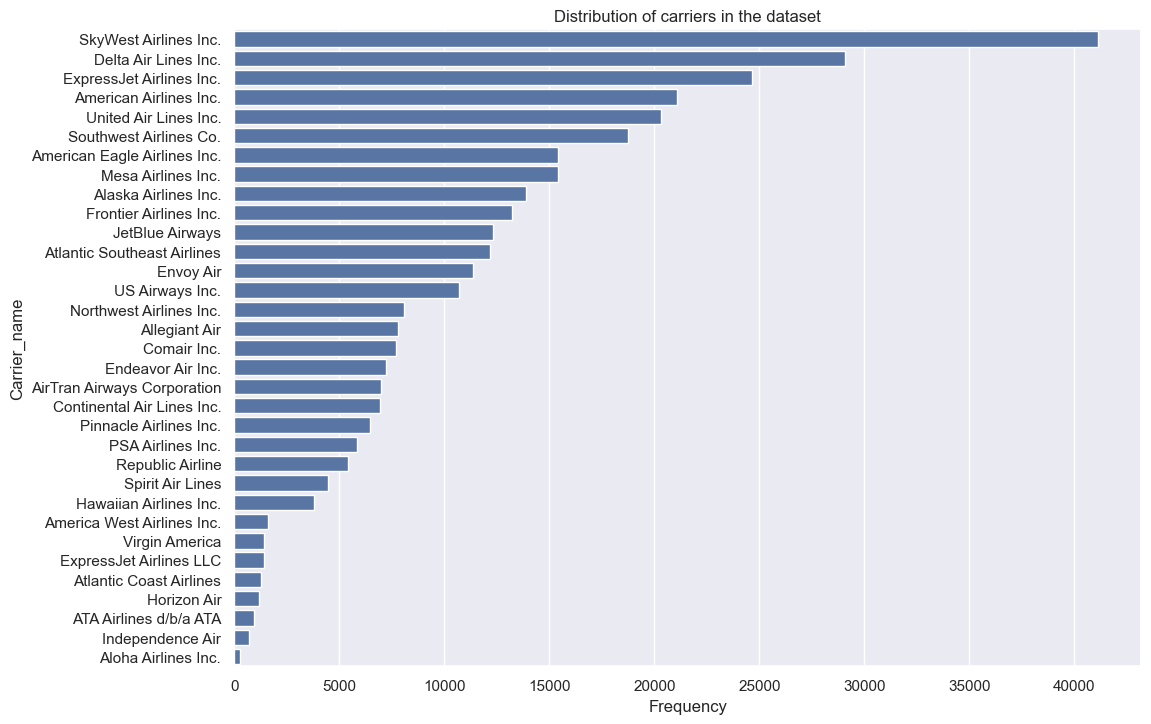

In [170]:
#https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/
#https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
#https://stackoverflow.com/questions/46623583/order-categories-by-count-in-a-seaborn-countplot
base_color = sb.color_palette()[0]

order_desc = delay_cause['carrier_name'].value_counts().index

sb.set(rc={'figure.figsize':(11.7,8.27)})

# Use the `color` argument
sb.countplot(data=delay_cause, y='carrier_name', color=base_color, order = order_desc)
plt.title('Distribution of carriers in the dataset')
plt.xlabel('Frequency')
plt.ylabel('Carrier_name');

From the above chart we can observe that SkyWest Airlines has occured more frequently in the dataset, which roughly translates to connectivity to several airports/cities (with a record per each month).

### Distribution of cities in the dataset

The below charts is the frequency of each city occuring in the dataset. 

**This is not the same as total arrived aircrafts at these cities

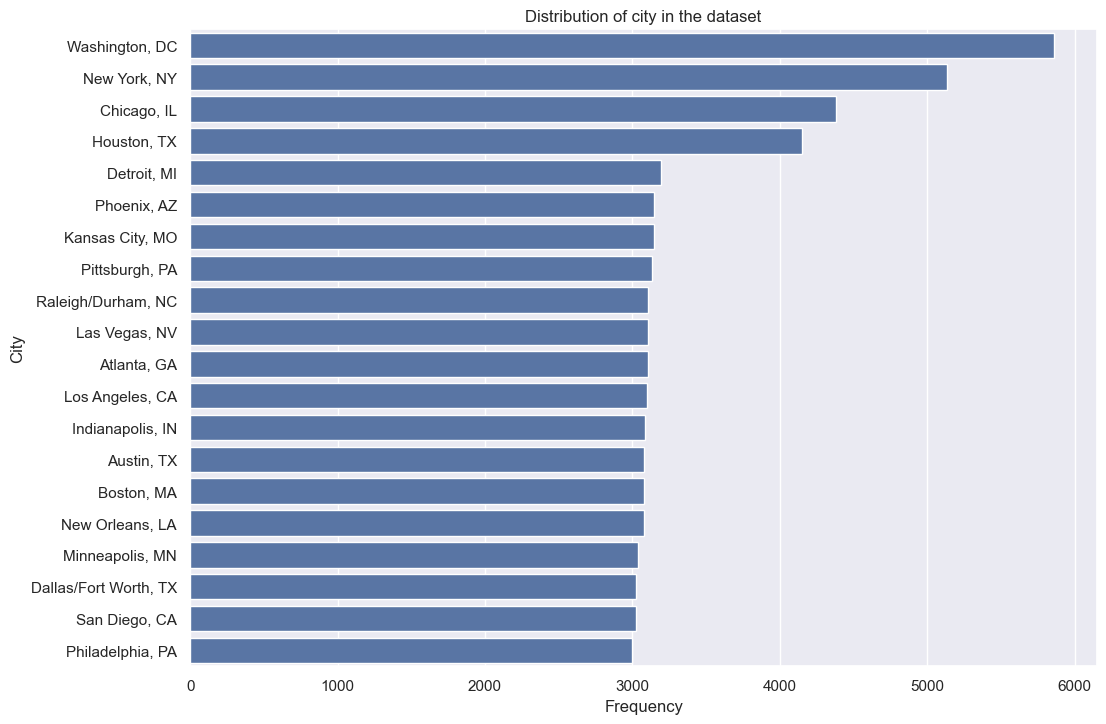

In [171]:
#https://stackoverflow.com/questions/32891211/limit-the-number-of-groups-shown-in-seaborn-countplot

base_color = sb.color_palette()[0]
#below code displays the top 20 cities
order_desc = delay_cause['city'].value_counts().iloc[:20].index


sb.set(rc={'figure.figsize':(11.7,8.27)})

# Use the `color` argument
sb.countplot(data=delay_cause, y='city', color=base_color, order = order_desc)
plt.title('Distribution of city in the dataset')
plt.xlabel('Frequency')
plt.ylabel('City');

### Distribution of airports in the dataset

The below charts is the frequency of each airport occuring in the dataset. 

**This is not the same as total arrived aircrafts at these airports

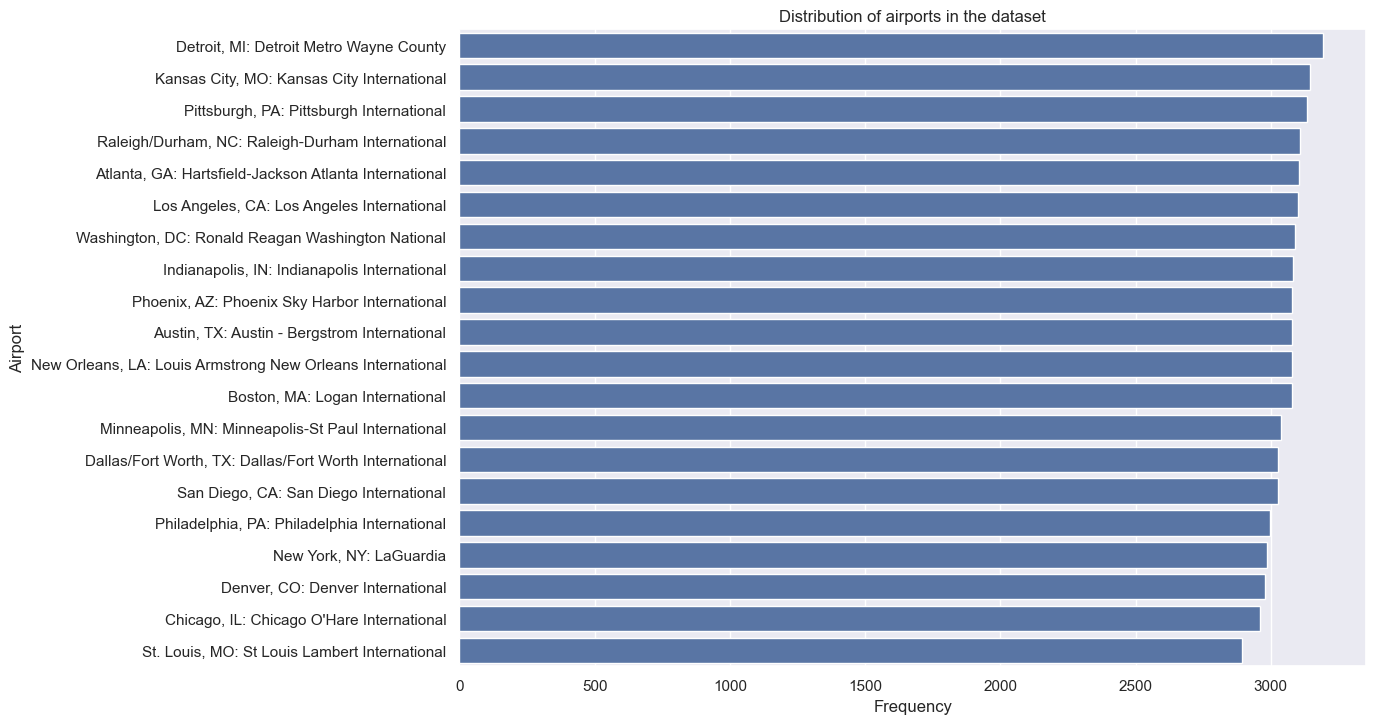

In [172]:
base_color = sb.color_palette()[0]

order_desc = delay_cause['airport_name'].value_counts().iloc[:20].index

sb.set(rc={'figure.figsize':(11.7,8.27)})

# Use the `color` argument
sb.countplot(data=delay_cause, y='airport_name', color=base_color, order = order_desc)
plt.title('Distribution of airports in the dataset')
plt.xlabel('Frequency')
plt.ylabel('Airport');

It may be observed that even thought washington DC has the highest frequency, it is Detroit's airport that has the highest frequency as Washinton DC has two airports

### Distribution of cancelled flights in the dataset

For this we will observe the histogram of cancelled flights

In [173]:
delay_cause.arr_cancelled.describe()

count    338609.000000
mean          7.225582
std          36.956561
min           0.000000
25%           0.000000
50%           1.000000
75%           4.000000
max        4951.000000
Name: arr_cancelled, dtype: float64

IQR is 4-0 =4
Outliers are Q3+1.5 IQR = 4+1.5*4 = 10

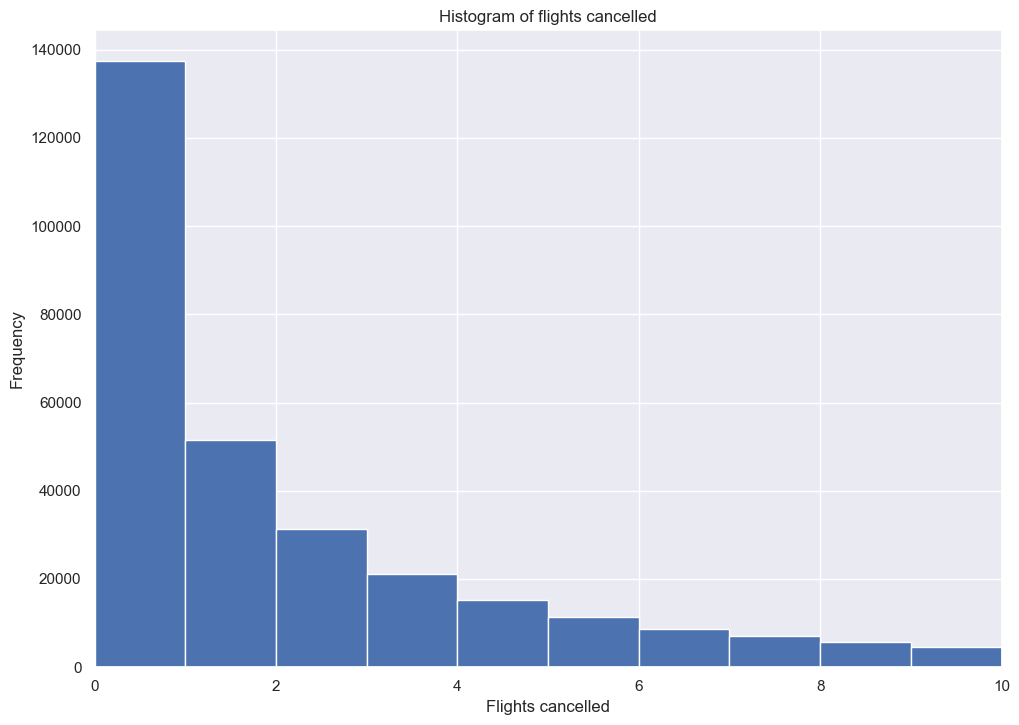

In [174]:
bins = np.arange(0, delay_cause['arr_cancelled'].max()+1, 1)
plt.hist(data = delay_cause, x = 'arr_cancelled', bins = bins)
plt.title('Histogram of flights cancelled');
plt.xlabel('Flights cancelled')
plt.ylabel('Frequency')
plt.xlim((0,10));


I would like to check the cancelled flights distribution in year 2020

In [175]:
delay_cause.query('year == 2020').arr_cancelled.describe()

count    18769.000000
mean        14.973307
std        103.090418
min          0.000000
25%          0.000000
50%          0.000000
75%          4.000000
max       4951.000000
Name: arr_cancelled, dtype: float64

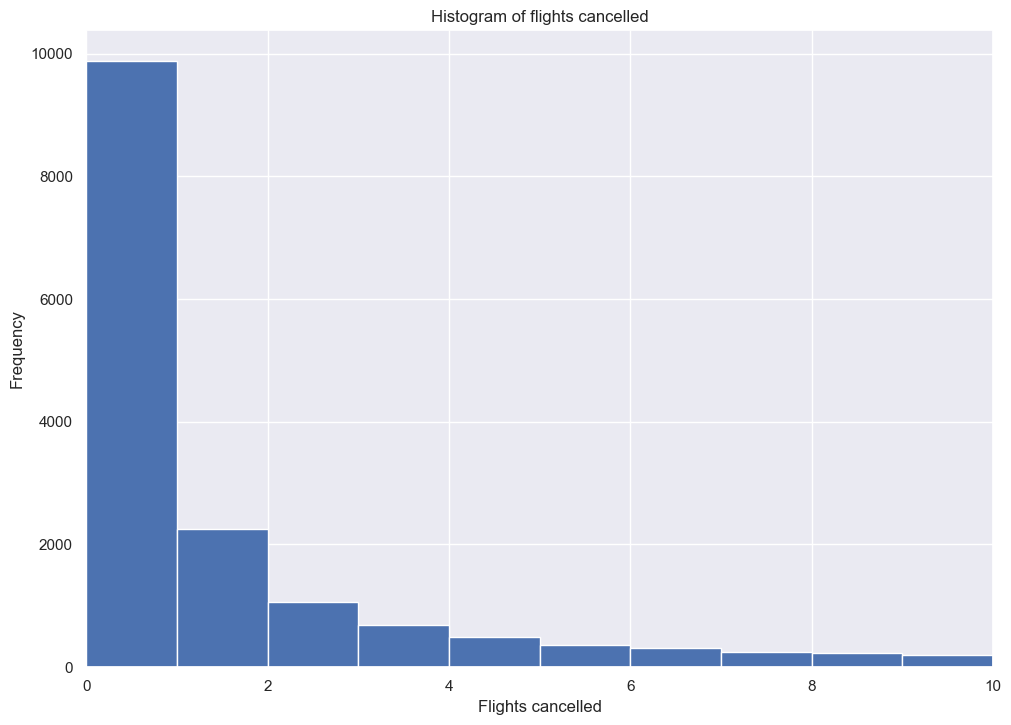

In [176]:
delay_cause_2020 = delay_cause.query('year == 2020')
bins = np.arange(0, delay_cause_2020['arr_cancelled'].max()+1, 1)
plt.hist(data = delay_cause_2020, x = 'arr_cancelled', bins = bins)
plt.title('Histogram of flights cancelled');
plt.xlabel('Flights cancelled')
plt.ylabel('Frequency')
plt.xlim((0,10));

The outliers in the dataset are mainly from year 2020. This can be observed from the max value of whole dataset and year 2020

### Distribution of diverted flights

For this we will observe the histogram of cancelled flights

In [177]:
delay_cause.arr_diverted.describe()

count    338609.000000
mean          0.865450
std           3.890923
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         256.000000
Name: arr_diverted, dtype: float64

Q3 + 1.5 IQR is 1+1.5 =2.5

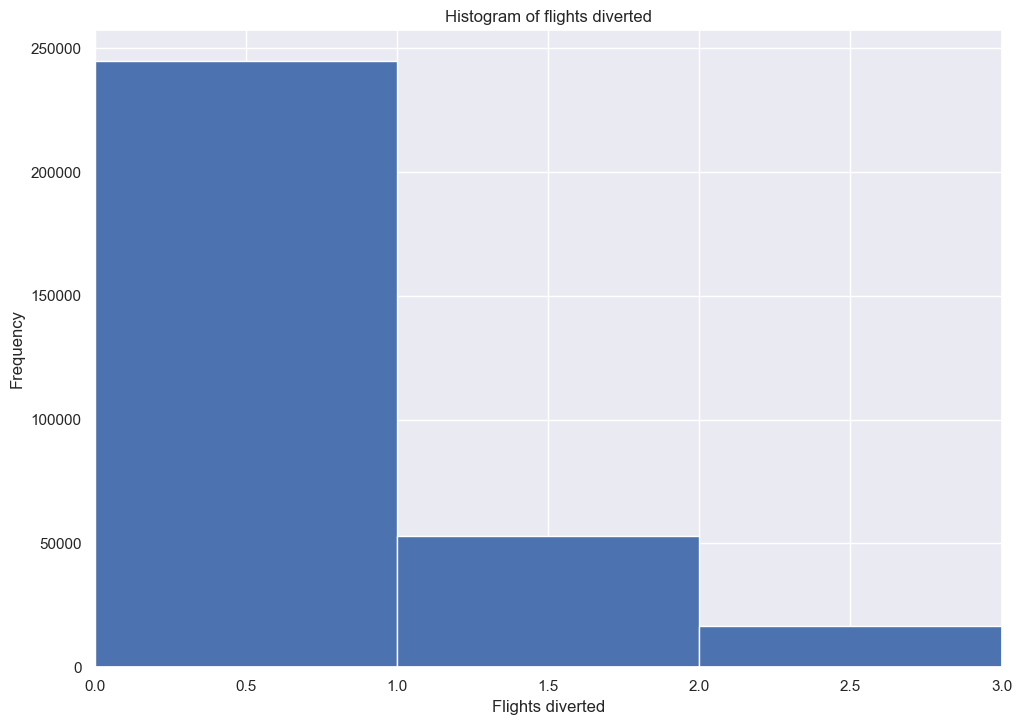

In [178]:
bins = np.arange(0, delay_cause['arr_diverted'].max()+1, 1)
plt.hist(data = delay_cause, x = 'arr_diverted', bins = bins)
plt.title('Histogram of flights diverted');
plt.xlabel('Flights diverted')
plt.ylabel('Frequency')
plt.xlim((0,3));


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

There weren't any unusual distributions. I did attempt to use logaritmic scale and use xlim whenever data is mostly concentrated in a particular range.

The distribution of many variables are right skewed.

Outliers in the right skewed data were identified using IQR. xlim was used with appropriate values to focus on the range of interest



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I tried to melt the dataset to observe which among the causes had resulted in most delay in number of flights and minutes. 

I also separated airport name and city name from the airport name in the original dataset.

There were few missing values in the arr_del15 column. The values have been recalculated using the number of flights canceled for each reason.

It was observed that there was missing data in delays and flights. The extra records where these columns were missing records are dropped.

Delta Airlines/Atlanta airport has most frequency of flights

IQR was calculated to identify outliers in skewed for all variables

Arr_flights log transformation showed mulitmodal distribution

Melted dataframe to analyze biggest reason for delays in minutes and delays in flights

Flight counts delayed: late_aircraft_ct (most); nas_ct; carrier_ct; weather_ct (least); and security_ct (least)

Flight delay minutes: late_aircraft_delay (most); carrier_delay; nas_delay; weather_delay (least); and security_delay (least)

Carrier_delay is 2nd biggest reason for delay, while carrier_ct is 3rd biggest reason

Weather does not have much impact on flight delay

Skywest Airlines has most occurences in the dataset (distribution)

Washington D.C. has most occurences in the dataset by city (possibly due to 2 airports)

Detroit MI: Detroit Metro Wayne County airport has most occurences 

Most flights cancellations took place in 2020


## Bivariate Exploration



### Is there a relationship between number of flights arrived to number of flights delayed by more than 15 mins?

To find out the relationship between flights arrived to number of flights delayed, we will be looking for correlation with scatter plots

Below function is created for reusing the seaborn regression plot.

In [179]:
def myRegPlot(df,xVar,yVar,x_jitter=0, y_jitter=0,title='',lcolor='orange',s=1,fit_reg= True):
    '''
    This function plots a seaborn regression plot.
    
    inputs:
    df = dataframe to be plotted
    xVar = variable to plot of x-axis
    yVar = variable to plot on y-axis
    x_jitter is set with 0 as default value (optional)
    y_jitter is set with 0 as default value (optional)
    title is set to '' as default value (optional)
    lcolor is line color with orange as default value (optional)
    s is set with 1 as default value (optional)
    fit_reg is set to True as defaut value
    
    output:
    Regression plot
    
    '''
    #create the first axes
    fig, ax = plt.subplots(nrows =1, ncols = 1, figsize = [14,6]);
    
    #plot
    sb.regplot(data = df, x = xVar, y = yVar, x_jitter = x_jitter, y_jitter = y_jitter, scatter_kws={'s':s},line_kws = {'color': lcolor},fit_reg = fit_reg)
    
    #title labels
    xVar = xVar.replace("_"," ") # replace _ with a space
    yVar = yVar.replace("_"," ") # replace _ with a space
    
    #add title 
    
    plt.title(f' Relationship between {yVar} and {xVar} {title}'.title(),fontsize = 14, weight = "bold")
    
    #add x label and format it
    
    plt.xlabel(xVar.title(), fontsize = 10, weight = "bold")
    
    #add y label and format it
    
    plt.ylabel(yVar.title(), fontsize = 10, weight = "bold")

''

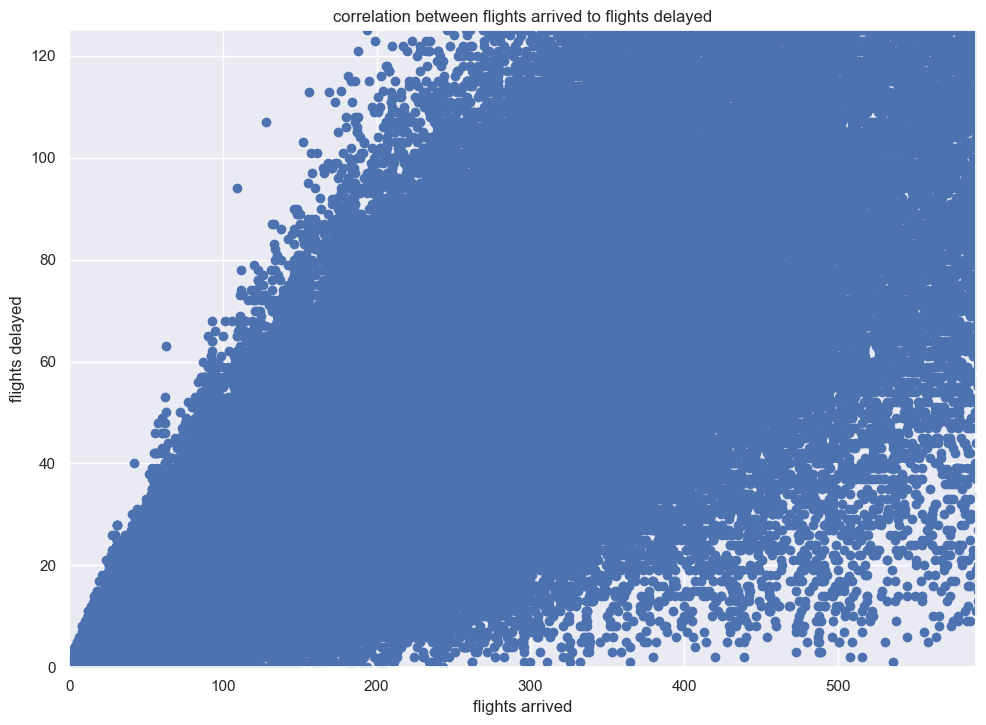

In [180]:
# Scatter plot
plt.scatter(data = delay_cause, x = 'arr_flights', y = 'arr_del15_new')
plt.xlabel('arrival flights')
plt.ylabel('flights delayed by more than 15 min.')
plt.title('correlation between flights arrived to flights delayed')
plt.xlabel('flights arrived')
plt.ylabel('flights delayed')
#xlim for arrived flights from arrived flights distribution
plt.xlim(0,590)
#ylim for delayed flights from delayed count distribution
plt.ylim(0,125)

;

we can observe that there is overplotting in the above scatterplot. We are attempting to check the relation by adding some jitter in below chart

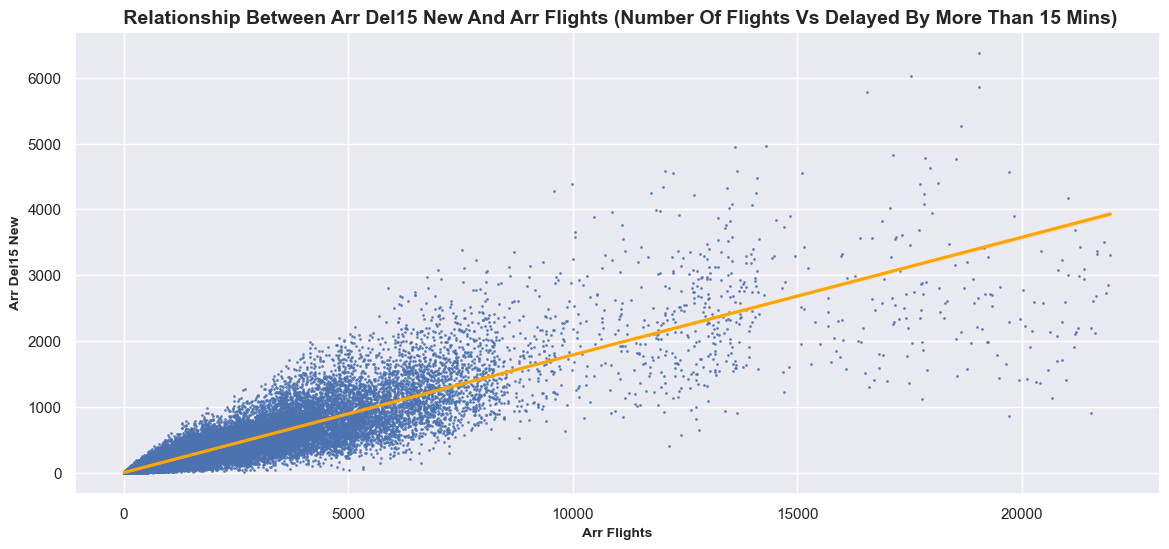

In [181]:
#call regression plot function

myRegPlot(delay_cause,'arr_flights','arr_del15_new',title ='(Number of flights vs delayed by more than 15 mins)')

As the relation is still is unclear with jitter, we are plotting the below scatterplot by taking a sample of data. Also to remove the outliers we have applied xlim and ylim for the individual columns based on the IQR calculations performed in the univariate analysis for these variables.

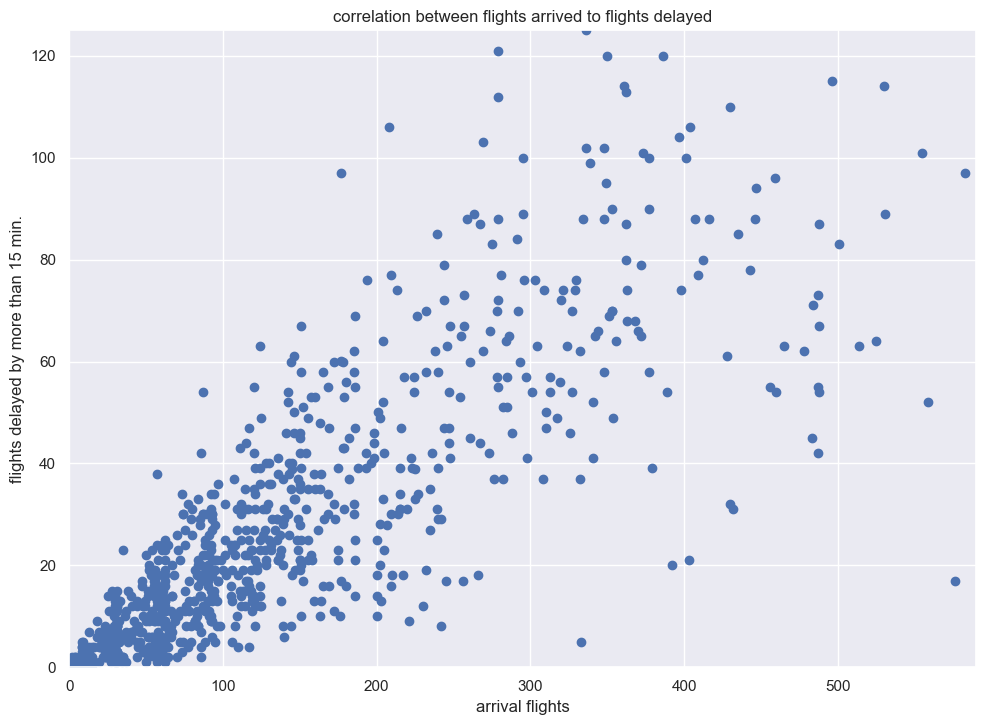

In [182]:
random_sample = delay_cause.sample(n=1000, random_state=42)

# Scatter plot
plt.scatter(data = random_sample, x = 'arr_flights', y = 'arr_del15_new')
plt.xlabel('arrival flights')
plt.ylabel('flights delayed by more than 15 min.')
plt.title('correlation between flights arrived to flights delayed')
#xlim for arrived flights from arrived flights distribution
plt.xlim(0,590)
#ylim for delayed flights from delayed count distribution
plt.ylim(0,125);

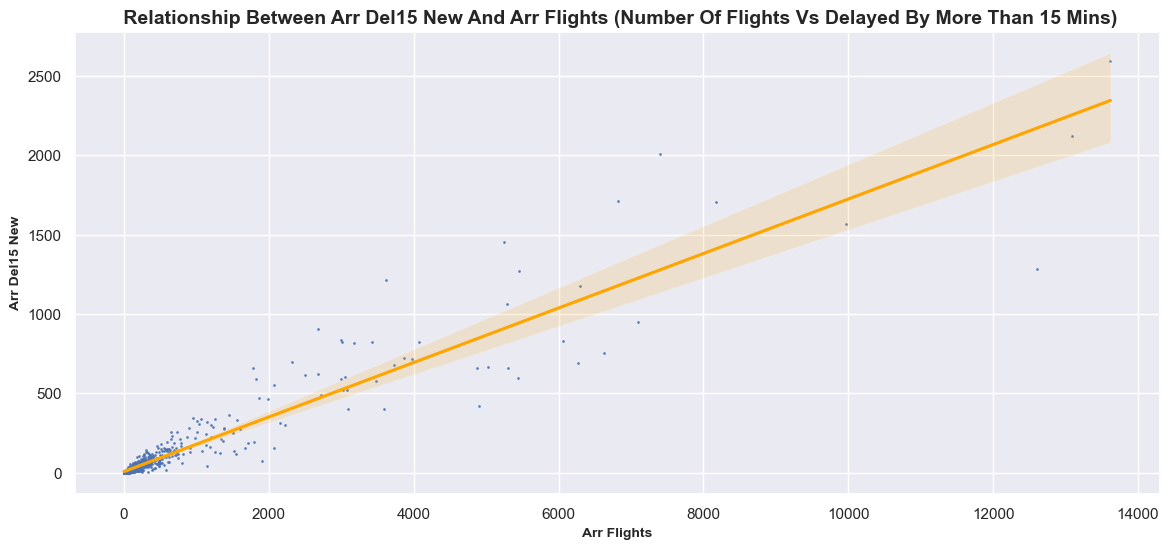

In [183]:
#call regression plot function

myRegPlot(random_sample,'arr_flights','arr_del15_new',title ='(Number of flights vs delayed by more than 15 mins)')



From above chart we can observe there is some correlation between number of flights arriving to delay greater than 15 minutes.

### What does the trend look for delay by 15 mins flights to ratio of total flights

I would like to observe the boxplot of arrival ratio by year

''

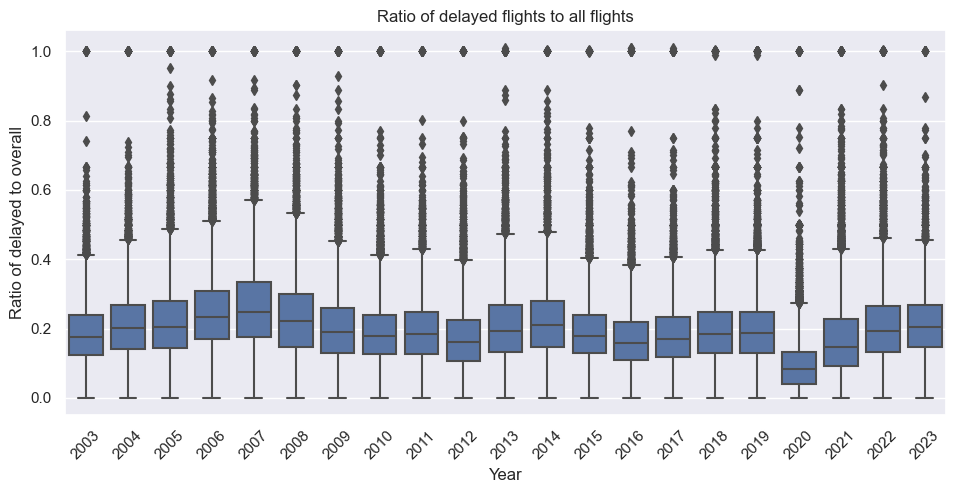

In [184]:
plt.figure(figsize = [25, 5])
base_color = sb.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.boxplot(data=delay_cause, x='year', y='arr_del15_ratio', color=base_color)
plt.xticks(rotation=45)
plt.title('Ratio of delayed flights to all flights');
plt.xlabel('Year')
plt.ylabel('Ratio of delayed to overall');
;

It is interesting to note that the ratio of delay to total flights fluctuates each year, but not as drastic as in 2020. This may have to with reduced flights during the COVID-19 pandemic. We knew there is some relationship between total flights arriving to flights delayed by more than 15 minutes. Also nas_ct (National Aviation System also called traffic) is the 2nd biggest reason for most flight delays. 

This mean if less flights are operating during pandemic, then there is less traffic, resulting in less delays due to air traffic.

### Has the total flights arrived changed over years?

To answer this we would need to create a bar chart with year and the total flights arrived. Below I am performing a groupby on the dataframe by year and number of flights arrived.

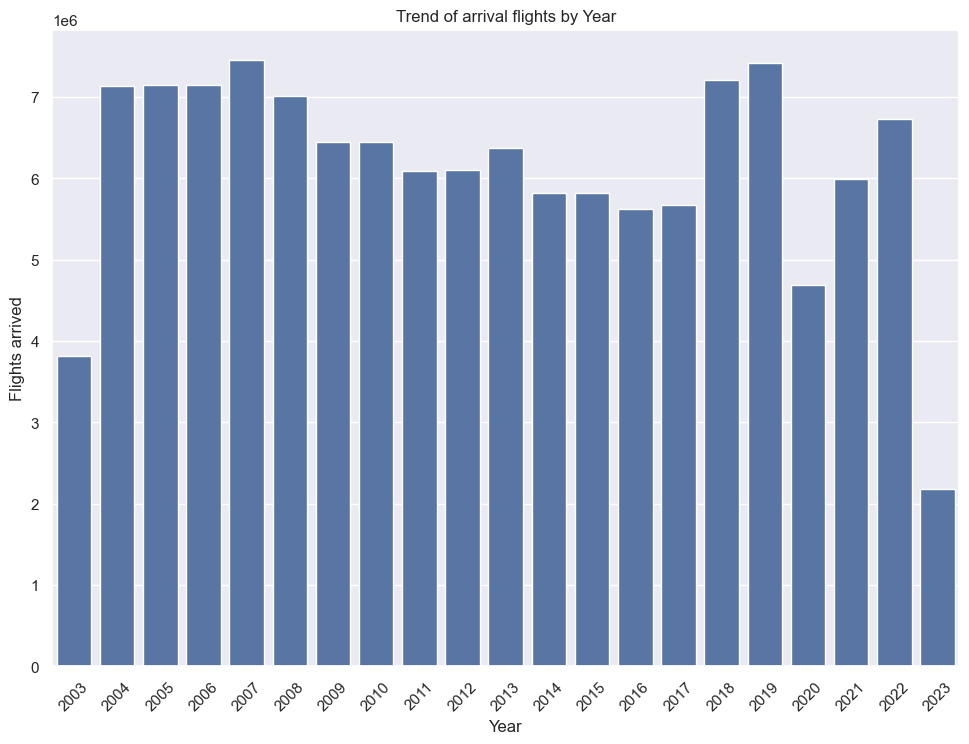

In [185]:
base_color = sb.color_palette()[0]

                          
delay_cause_grp = delay_cause.groupby(['year'],as_index=False)['arr_flights'].sum()


sb.set(rc={'figure.figsize':(11.7,8.27)})

# Use the `color` argument

sb.barplot(data=delay_cause_grp, x='year', y='arr_flights', color=base_color)
plt.title('Trend of arrival flights by Year')
plt.xlabel('Year')
plt.ylabel('Flights arrived')
plt.xticks(rotation = 45)

plt.show();

From the above chart we can see that the number of flights arrived fell significantly since 2020 and has been gradually increasing till 2023.

### Has the trend of cancelled flights changed over years?

To answer this we would need to create a bar chart with year and the total canceled flights. Below I am performing a groupby on the dataframe by year and number of canceled flights.

In [186]:
delay_cause.arr_cancelled.describe()

count    338609.000000
mean          7.225582
std          36.956561
min           0.000000
25%           0.000000
50%           1.000000
75%           4.000000
max        4951.000000
Name: arr_cancelled, dtype: float64

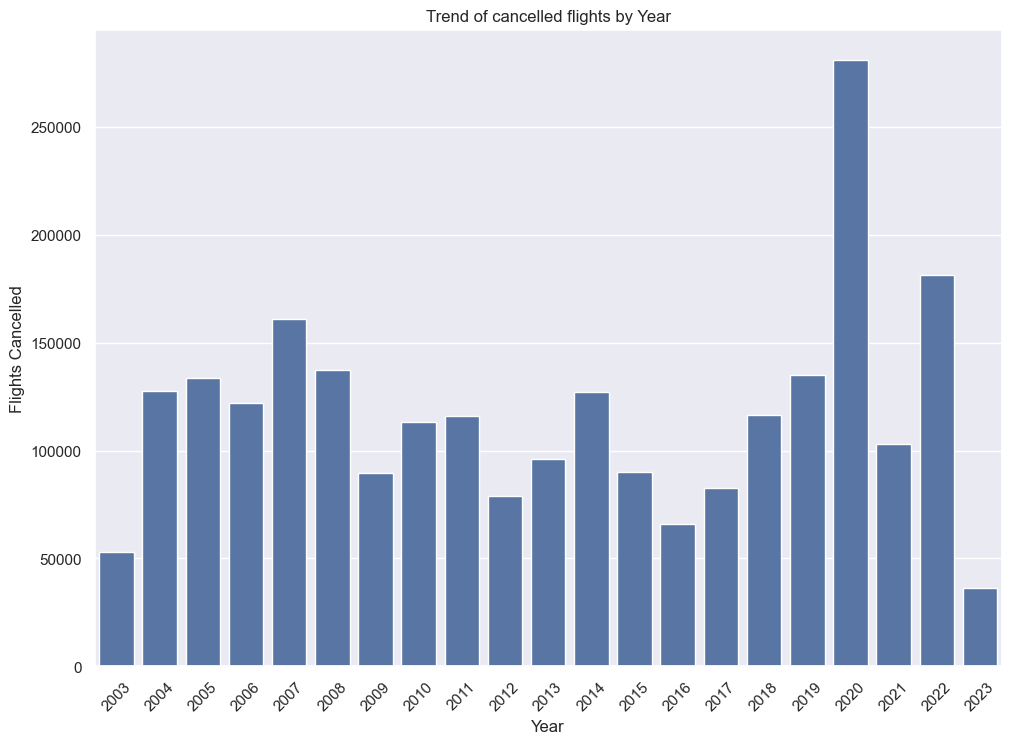

In [187]:
base_color = sb.color_palette()[0]

                          
delay_cause_grp = delay_cause.groupby(['year'],as_index=False)['arr_cancelled'].sum()


sb.set(rc={'figure.figsize':(11.7,8.27)})

# Use the `color` argument

sb.barplot(data=delay_cause_grp, x='year', y='arr_cancelled', color=base_color)
plt.title('Trend of cancelled flights by Year')
plt.xlabel('Year')
plt.ylabel('Flights Cancelled')
plt.xticks(rotation = 45)

plt.show();

Significant number of flights got cancelled in the year 2020

In [188]:
delay_cause.query('year == 2020')['arr_cancelled'].describe(),delay_cause.query('year != 2020')['arr_cancelled'].describe()

(count    18769.000000
 mean        14.973307
 std        103.090418
 min          0.000000
 25%          0.000000
 50%          0.000000
 75%          4.000000
 max       4951.000000
 Name: arr_cancelled, dtype: float64,
 count    319840.000000
 mean          6.770926
 std          28.610866
 min           0.000000
 25%           0.000000
 50%           1.000000
 75%           4.000000
 max        1969.000000
 Name: arr_cancelled, dtype: float64)

It is interesting to note that the mean and max cancellations in 2020 are more than rest of the years

### Has the trend of diverted flights changed over years?

To answer this we would need to create a bar chart with year and the total diverted flights. Below I am performing a groupby on the dataframe by year and number of diverted flights.

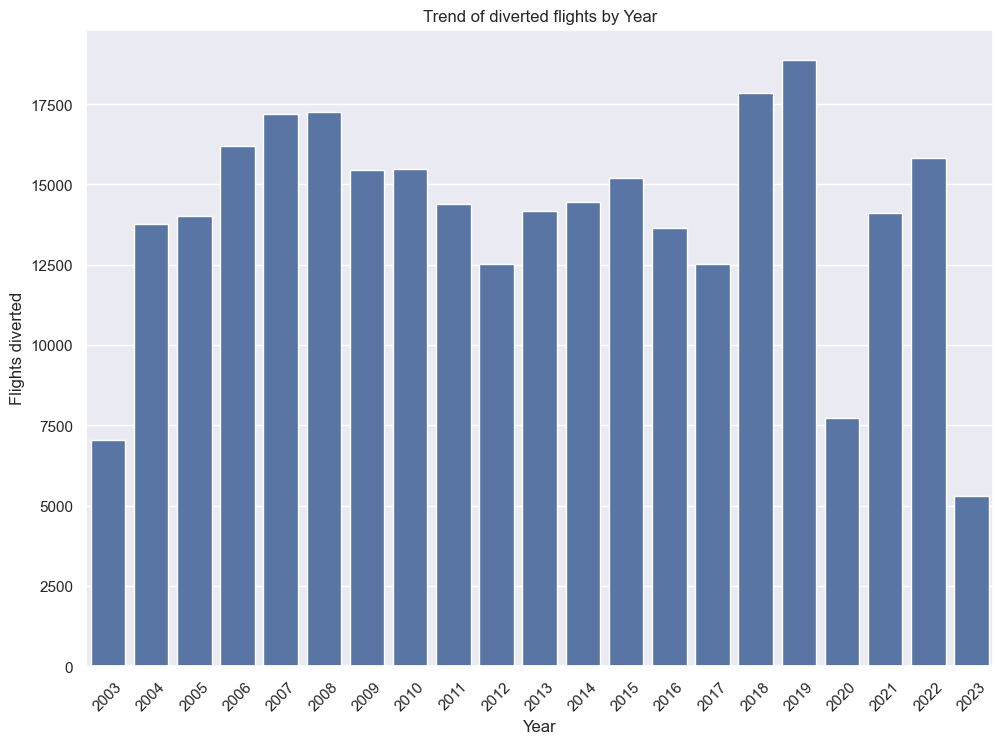

In [189]:
base_color = sb.color_palette()[0]

                          
delay_cause_grp = delay_cause.groupby(['year'],as_index=False)['arr_diverted'].sum()


sb.set(rc={'figure.figsize':(11.7,8.27)})

# Use the `color` argument

sb.barplot(data=delay_cause_grp, x='year', y='arr_diverted', color=base_color)
plt.title('Trend of diverted flights by Year')
plt.xlabel('Year')
plt.ylabel('Flights diverted')
plt.xticks(rotation = 45)

plt.show();

The numbers of flights diverted in 2020 is less compared to any years

### What does the trend for cancel ratio look like?

Let us check what the trend looks like for ratio of cancelled flights

In [190]:
delay_cause.arr_cancelled_ratio.describe()

count    338609.000000
mean          0.021593
std           0.053575
min           0.000000
25%           0.000000
50%           0.006494
75%           0.024345
max           1.000000
Name: arr_cancelled_ratio, dtype: float64

''

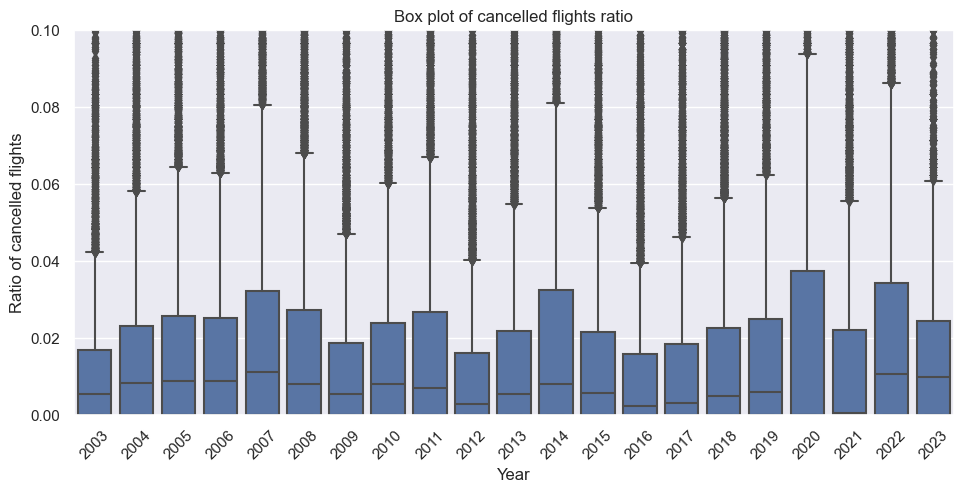

In [191]:
plt.figure(figsize = [25, 5])
base_color = sb.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.boxplot(data=delay_cause, x='year', y='arr_cancelled_ratio', color=base_color)
plt.ylim((0,0.1))
plt.xticks(rotation=45)
plt.title('Box plot of cancelled flights ratio')
plt.xlabel('Year')
plt.ylabel('Ratio of cancelled flights')
;

The ylim has been applied to boxplot as the cancellations are less than 10% in all of the years. 

It can also be observed that the cancelled flights ratio median years 2020 and 2021 is closed to 0

### What does the ratio of divertion look like?

Let us check what the trend looks like for ratio of diverted flights

In [192]:
delay_cause.arr_diverted_ratio.describe()

count    338609.000000
mean          0.003175
std           0.024350
min           0.000000
25%           0.000000
50%           0.000000
75%           0.001194
max           1.000000
Name: arr_diverted_ratio, dtype: float64

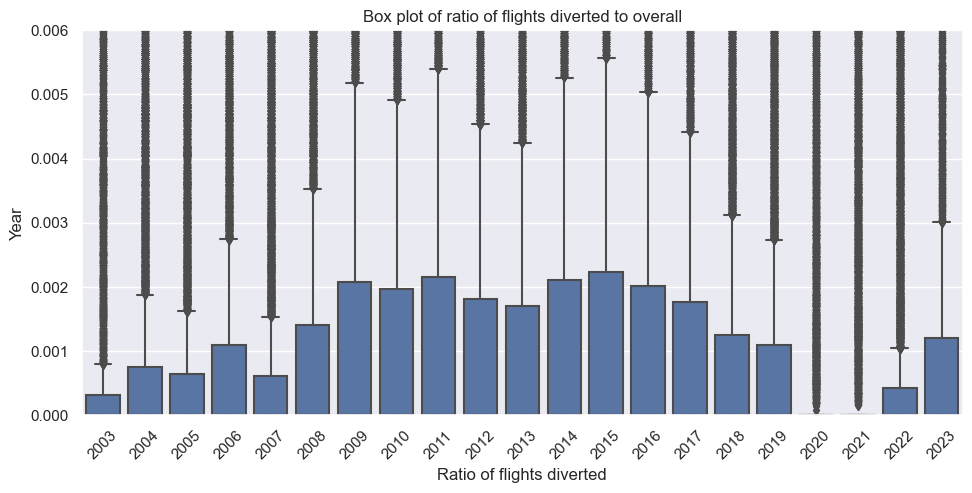

In [193]:
plt.figure(figsize = [25, 5])
base_color = sb.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.boxplot(data=delay_cause, x='year', y='arr_diverted_ratio', color=base_color)
plt.ylim((0,0.006))
plt.xticks(rotation=45)
plt.title('Box plot of ratio of flights diverted to overall')
plt.xlabel('Ratio of flights diverted')
plt.ylabel('Year');

The diverted ratio resembles what we saw in the cancelled ratio for years 2020 and 2021. There are not many flights diverted, which is related to less flights arrving.

### What are the top 10 airports with most flight arrivals?

To build the bar chart with top 10 airports with most arrivals, we will first identify the airports and then slice the dataframe for other total flights arrived

                                          airport_name  arr_flights
19   Atlanta, GA: Hartsfield-Jackson Atlanta Intern...    7589990.0
69           Chicago, IL: Chicago O'Hare International    6147386.0
91   Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...    5449032.0
97                    Denver, CO: Denver International    4513853.0
229         Los Angeles, CA: Los Angeles International    4188295.0
311      Phoenix, AZ: Phoenix Sky Harbor International    3472593.0
171  Houston, TX: George Bush Intercontinental/Houston    3382432.0
356     San Francisco, CA: San Francisco International    2887818.0
64      Charlotte, NC: Charlotte Douglas International    2851707.0
217              Las Vegas, NV: McCarran International    2798377.0


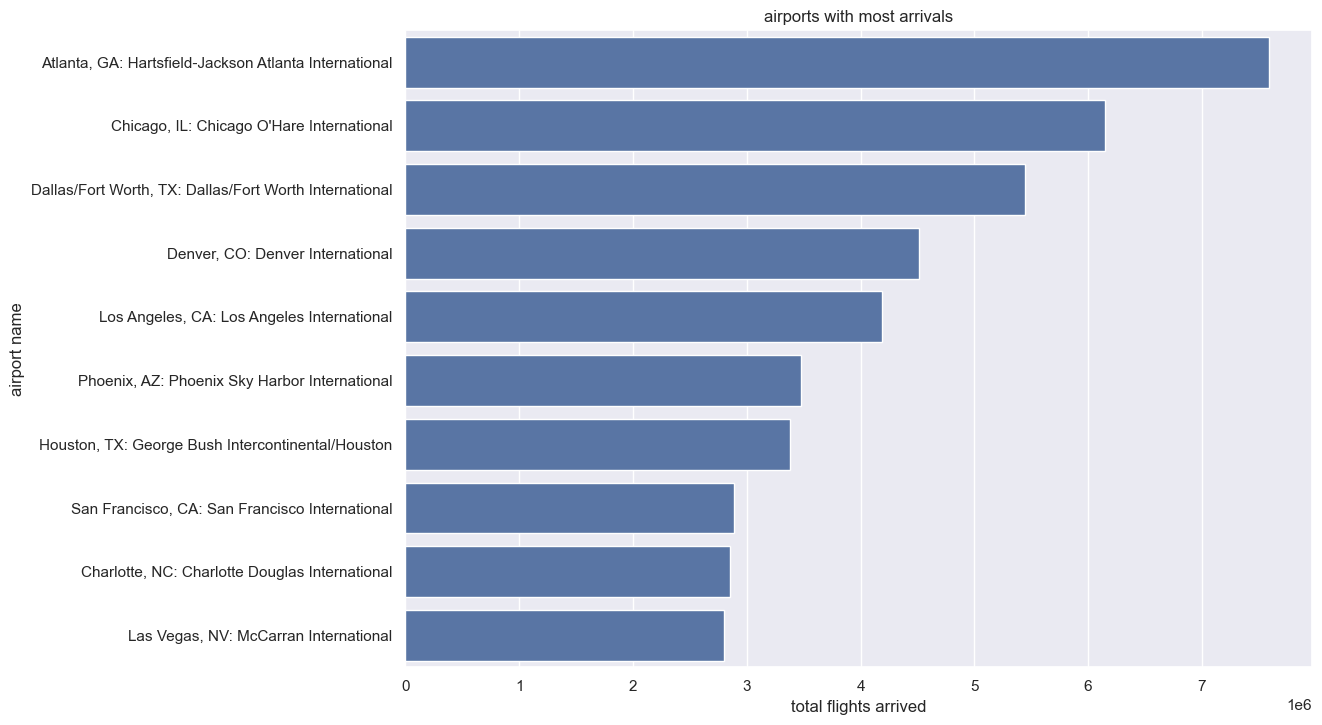

In [194]:
#https://sparkbyexamples.com/pandas/pandas-groupby-sum-examples/#:~:text=Use%20DataFrame.,given%20column%20for%20each%20group.
#https://www.geeksforgeeks.org/how-to-sort-pandas-dataframe/
#https://stackoverflow.com/questions/46431243/pandas-dataframe-groupby-how-to-get-sum-of-multiple-columns
#https://stackoverflow.com/questions/48781344/pandas-filtering-isin-is-not-working
base_color = sb.color_palette()[0]
# to make the selection on top n dynamic
top_n = 10

top_n_airports = delay_cause.groupby(['airport_name'],as_index=False)['arr_flights'].sum().sort_values(by = ['arr_flights'],ascending = False)

print(top_n_airports.iloc[:top_n,0:2])


top_n_airports_records = delay_cause[delay_cause['airport_name'].isin(top_n_airports.iloc[0:top_n,0].astype(str).tolist())]
                          
top_n_airports_records_agg = top_n_airports_records.groupby(['airport_name'],as_index=False)['arr_flights'].sum()

order_desc = top_n_airports.iloc[0:top_n,0]
sb.set(rc={'figure.figsize':(11.7,8.27)})

# Use the `color` argument
sb.barplot(data=top_n_airports_records_agg, x='arr_flights', y='airport_name', color = base_color, order = order_desc)
plt.title('airports with most arrivals')
plt.xlabel('total flights arrived')
plt.ylabel('airport name');

plt.show()

Atlanta airport is the busiest in terms of number of arrived flights

### What are the top 10 carriers with most flight arrivals?

To build the bar chart with top 10 carriers with most arrivals, we will first identify the airports and then slice the dataframe for other total flights arrived

                    carrier_name  arr_flights
28        Southwest Airlines Co.   23305547.0
12          Delta Air Lines Inc.   14534473.0
6         American Airlines Inc.   13803513.0
27         SkyWest Airlines Inc.   12336276.0
31         United Air Lines Inc.    9866968.0
15      ExpressJet Airlines Inc.    7149219.0
30               US Airways Inc.    5188612.0
7   American Eagle Airlines Inc.    5184465.0
21               JetBlue Airways    4283195.0
2           Alaska Airlines Inc.    3453358.0


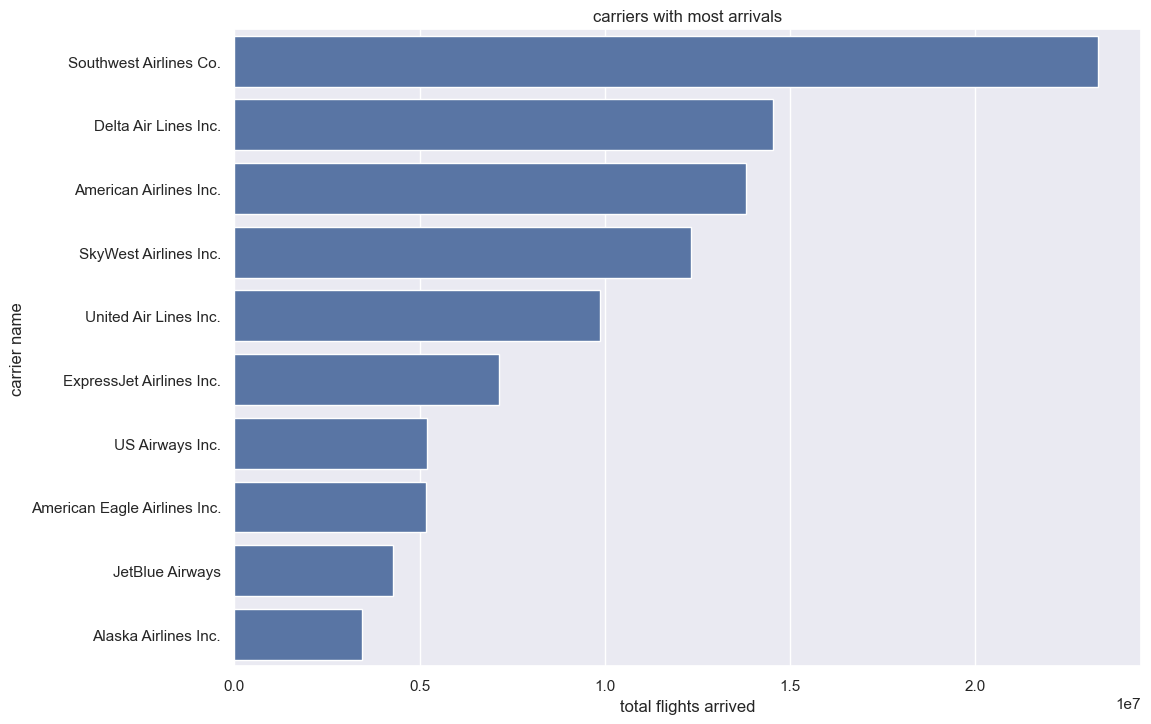

In [195]:
#https://sparkbyexamples.com/pandas/pandas-groupby-sum-examples/#:~:text=Use%20DataFrame.,given%20column%20for%20each%20group.
#https://www.geeksforgeeks.org/how-to-sort-pandas-dataframe/
#https://stackoverflow.com/questions/46431243/pandas-dataframe-groupby-how-to-get-sum-of-multiple-columns
#https://stackoverflow.com/questions/48781344/pandas-filtering-isin-is-not-working
base_color = sb.color_palette()[0]
# to make the selection on top n dynamic
top_n = 10

top_n_carriers = delay_cause.groupby(['carrier_name'],as_index=False)['arr_flights'].sum().sort_values(by = ['arr_flights'],ascending = False)

print(top_n_carriers.iloc[:top_n,0:2])


top_n_carriers_records = delay_cause[delay_cause['carrier_name'].isin(top_n_carriers.iloc[0:top_n,0].astype(str).tolist())]
                          
top_n_carriers_records_agg = top_n_carriers_records.groupby(['carrier_name'],as_index=False)['arr_flights'].sum()

order_desc = top_n_carriers.iloc[0:top_n,0]
sb.set(rc={'figure.figsize':(11.7,8.27)})

# Use the `color` argument
sb.barplot(data=top_n_carriers_records_agg, x='arr_flights', y='carrier_name', color = base_color, order = order_desc)
plt.title('carriers with most arrivals')
plt.xlabel('total flights arrived')
plt.ylabel('carrier name');

plt.show()

Southwest airlines has most flights arrived in the dataset

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Correlation was observed between arrived flights and flights delayed by 15 mins

Year 2020 had the least flights arrived; has been increasing gradually ever since

Most flights got cancelled in 2020. Cancellations in year 2020 were compared to rest of the years. Mean and max values in 2020 are more than the other years in the dataset

Less flights were divereted in year 2020. Since flights are usually diverted in case of weather, emergency, or heavy air traffic. 





### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Ratio of flights delayed to overall had a drastic drop in 2020. It could be due to the pandemic. Reduced traffic meant less delays (also late_aircraft_delay and nas_delay are one of the two main reasons for delay)

Yearly trend of arr_cancelled ratio showed 2020 and 2021 had median close to 0

Yearly trend of arr_diverted showed a trend similar to arr_cancelled ratio

Atlanta, GA: Hartsfield-Jackson Atlanta Internal Airport is busiest airport interms of flights arrived

Soutwest Airlines Co. has operated most number of flights




## Multivariate Exploration



In [196]:
#np.random.seed(2018)
#sample = np.random.choice(delay_cause.shape[0], 200, replace = False)
#delay_cause_subset = delay_cause.loc[sample]

### What is the interaction between different delay reasons?

To see the interaction between the variables, we are generating plot matrices plot matrices for various delays.

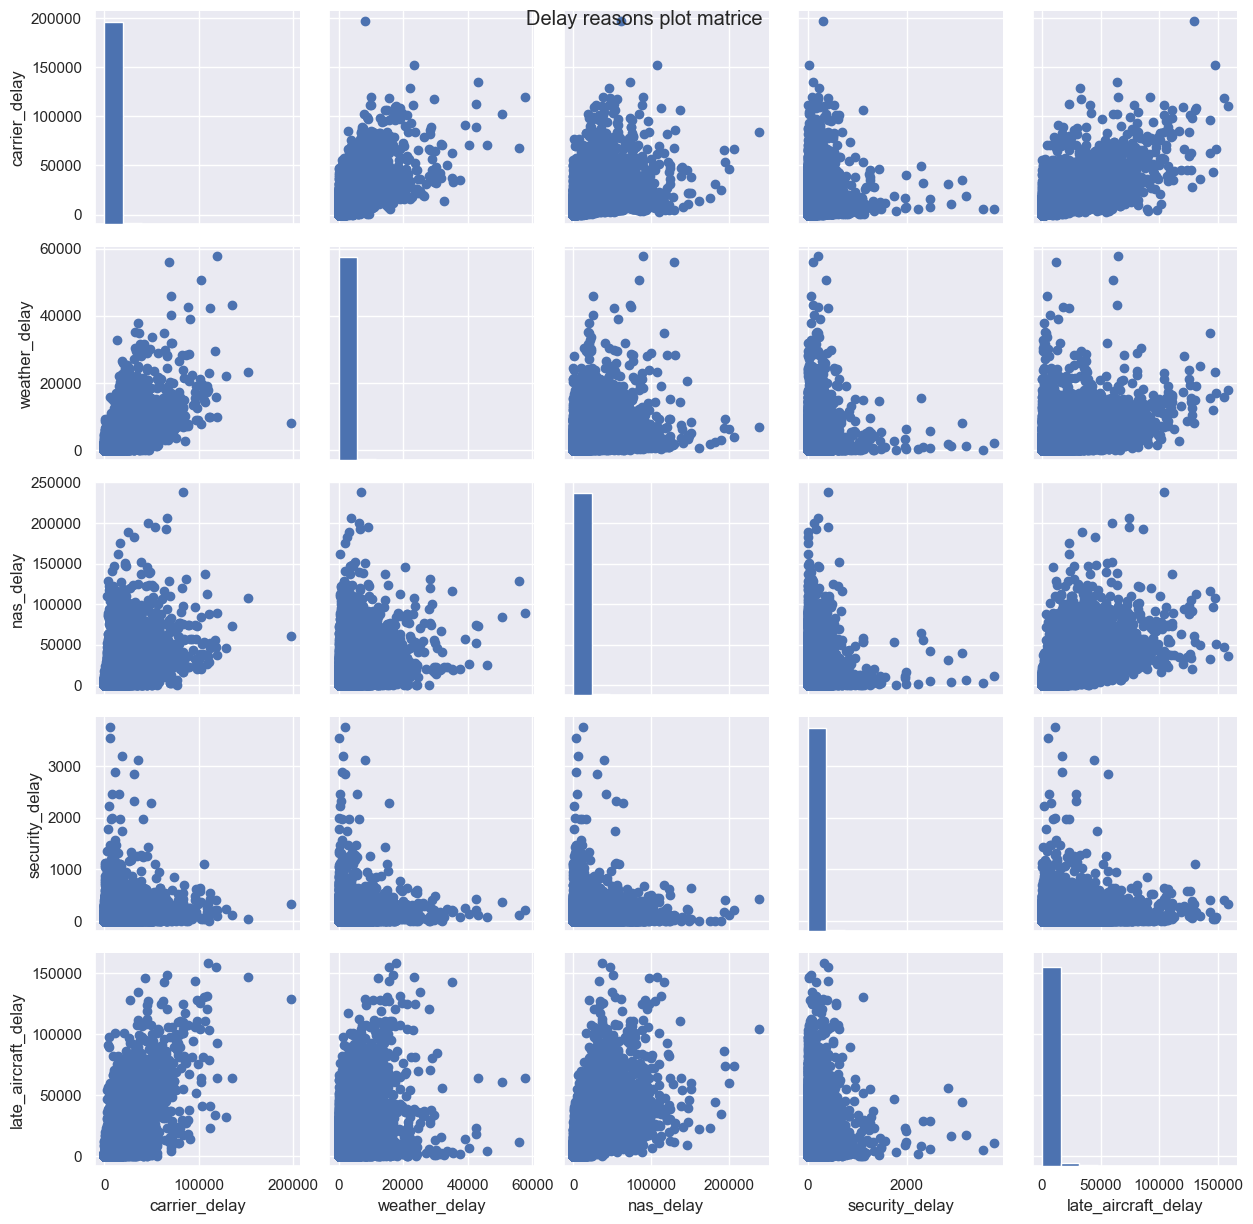

In [197]:
delay_stats = ['carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']
g= sb.PairGrid(data= delay_cause, vars = delay_stats)
g= g.map_offdiag(plt.scatter)
g.map_diag(plt.hist)
g.fig.suptitle('Delay reasons plot matrice');



There is some relation between different reasons for delay, but it is difficult to observe due to large dataset. For this reason 
I am creatting the correlation matrix with heatmap below.

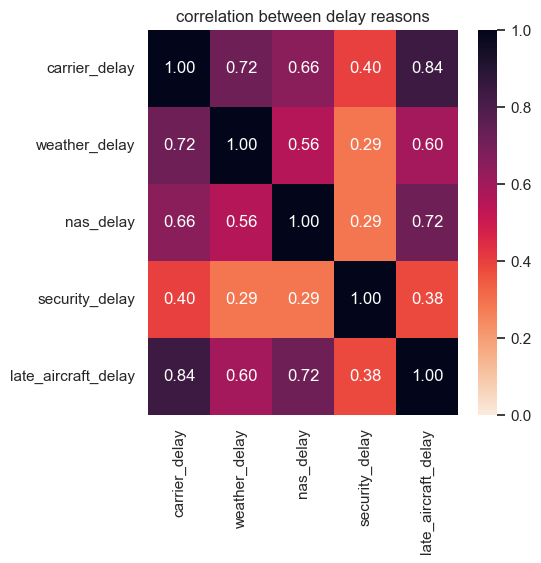

In [198]:
plt.rcParams['figure.figsize']=5,5
sb.heatmap(delay_cause[delay_stats].corr(),cmap = 'rocket_r',annot = True, fmt = '.2f', vmin =0)
plt.title('correlation between delay reasons');

There is high correlation observed between carrier_delay and late_aircraft_delay; late_aircraft_delay and nas_delay; carrier_delay and weather_delay

### How does weather impact flight delay each month?

Line chart of delay due to weather each month

                      city  arr_flights
66             Chicago, IL    7850776.0
19             Atlanta, GA    7589990.0
86   Dallas/Fort Worth, TX    5449032.0
92              Denver, CO    4513853.0
163            Houston, TX    4474583.0
257           New York, NY    4421539.0
215        Los Angeles, CA    4188295.0
286            Phoenix, AZ    3502972.0


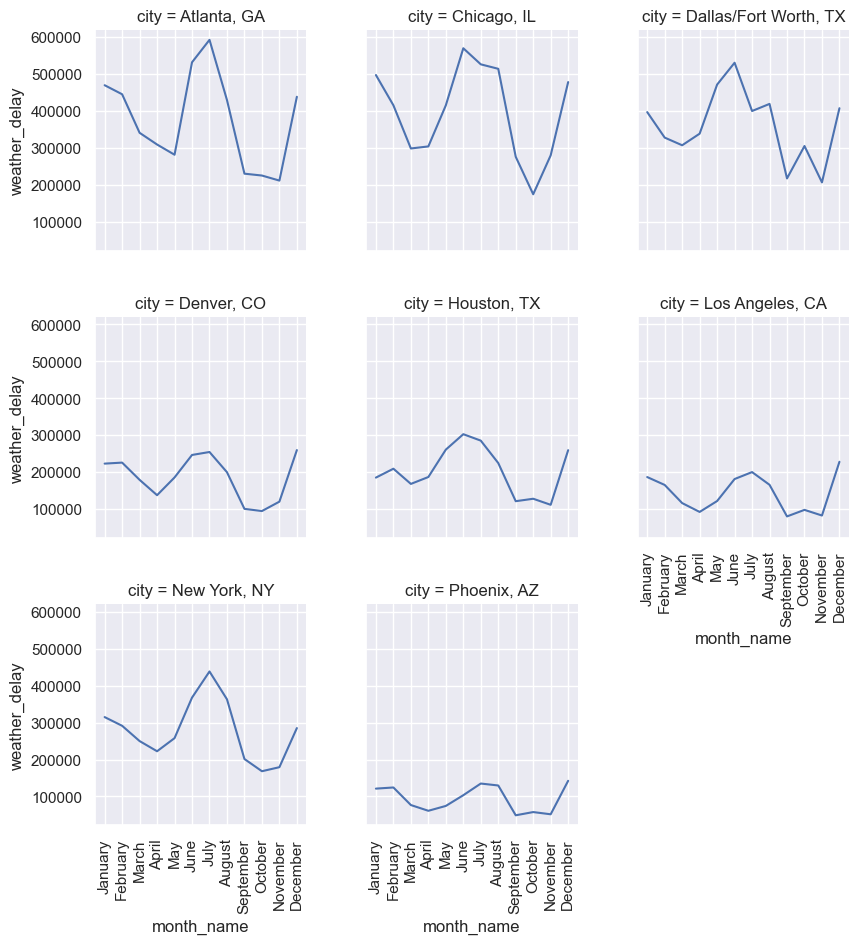

In [199]:
#https://stackoverflow.com/questions/68997238/how-to-set-ticks-in-seaborn-facetgrid

base_color = sb.color_palette()[0]

#month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

#mclasses = pd.api.types.CategoricalDtype(ordered=True, categories=month_order)

#delay_cause['month_name'] = delay_cause['month_name'].astype(mclasses);



delay_cause_agg = delay_cause.groupby(['city'],as_index=False)['arr_flights'].sum().sort_values(by = ['arr_flights'],ascending = False)

print(delay_cause_agg.iloc[:8,0:2])


filtered_df = delay_cause[delay_cause['city'].isin(delay_cause_agg.iloc[0:8,0].astype(str).tolist())]
                          
filter_df_sb = filtered_df.groupby(['city','month_name'],as_index=False)['weather_delay'].sum()

order_desc = delay_cause_agg.iloc[0:8,0]
sb.set(rc={'figure.figsize':(11.7,8.27)})

g = sb.FacetGrid(data = filter_df_sb, col = 'city', col_wrap=3, sharey=True)
g.map(sb.lineplot, 'month_name', 'weather_delay')

#g.set(xticks = xtick_month)
#g.set(xticks = filter_df_sb.month_name.tolist())
#g.set(xticks=np.arange(1,13,1))
#g.set_xticklabels(np.arange(1,13,1), rotation=45)
g.set_xticklabels(month_order,rotation=90)

# Use the `color` argument
#sb.barplot(data=filter_df_sb, x='arr_flights', y='city', color = base_color, order = order_desc)
plt.show()


June, July, and December are the months where the delay due to weather is high in all the top 8 cities with most arrivals

There seems to be direct correlation between delay due to air traffic and number of flights arriving into a city

Trend of cancellations by top 5 airlines most arrivals over time

              carrier_name  arr_flights
28  Southwest Airlines Co.   23305547.0
12    Delta Air Lines Inc.   14534473.0
6   American Airlines Inc.   13803513.0
27   SkyWest Airlines Inc.   12336276.0
31   United Air Lines Inc.    9866968.0


C:\Users\a042100\AppData\Local\Temp\ipykernel_31680\3053534949.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.arange(2003,2024,2), rotation=45)


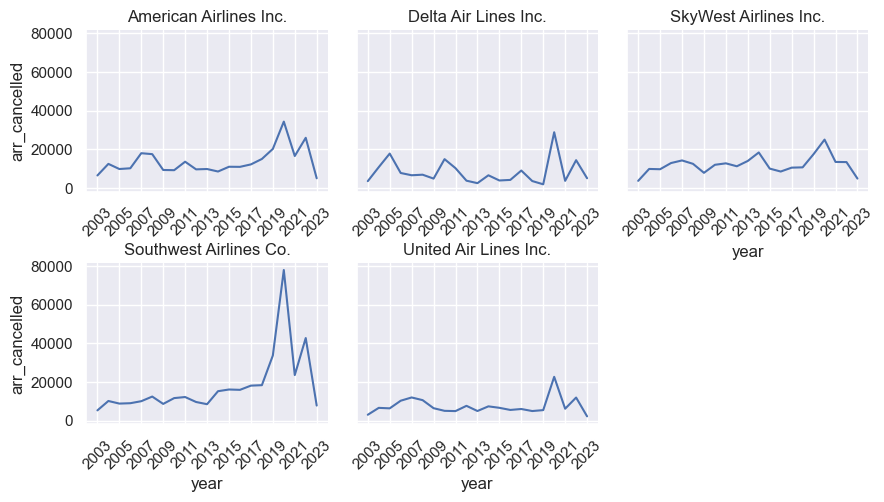

In [200]:


base_color = sb.color_palette()[0]

delay_cause_agg = delay_cause.groupby(['carrier_name'],as_index=False)['arr_flights'].sum().sort_values(by = ['arr_flights'],ascending = False)

print(delay_cause_agg.iloc[:5,0:2])


filtered_df = delay_cause[delay_cause['carrier_name'].isin(delay_cause_agg.iloc[0:5,0].astype(str).tolist())]
                          
filter_df_sb = filtered_df.groupby(['carrier_name','year'],as_index=False)['arr_cancelled'].sum()

order_desc = delay_cause_agg.iloc[0:5,0]
sb.set(rc={'figure.figsize':(12.7,8.6)})


g = sb.FacetGrid(data = filter_df_sb, col = 'carrier_name', col_wrap=3, sharey=True,margin_titles=False)
g.map(sb.lineplot, 'year', 'arr_cancelled')

#g.set(xticks = xtick_month)
#g.set(xticks = filter_df_sb.month_name.tolist())

#https://stackoverflow.com/questions/66572016/set-xticklabels-for-all-grids-for-a-plot-created-with-seaborn-catplot-that-uses

for ax in g.axes:
    ax.set_xticklabels(np.arange(2003,2024,2), rotation=45)
    ax.tick_params(labelbottom=True)


g.set(xticks=np.arange(2003,2024,2))
#g.set_xticklabels(np.arange(2003,2024,2), rotation=45)

#https://wckdouglas.github.io/2016/12/seaborn_annoying_title

g.set_titles(col_template="{col_name}");

#https://stackoverflow.com/questions/43669229/increase-space-between-rows-on-facetgrid-plot
g.fig.tight_layout()

g.fig.subplots_adjust(top=.8)
# Use the `color` argument
#sb.barplot(data=filter_df_sb, x='arr_flights', y='city', color = base_color, order = order_desc)
plt.show()

The cancellations in top 5 airlines spiked in 2020, with Southwest having the most cancellations

Above charts suggests that cancellations have nothing to do with flights being delayed.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

High correlation was observed between carrier_delay and late_aircraft_delay.

High correlation was observed beyween late_air_delay and nas_delay.

High correlation was observed between carrier_delay and weather_delay.

June, July, and December months experienced most flight delays due to weather.

### Were there any interesting or surprising interactions between features?

There was an interaction between number of flights arriving into the airport/city to the nas_delay, which is the delay due to air traffic


## Conclusions


The flight delays can be caused due to multiple reasons. We normally assume weather to be one of bigges reason for flight delays. It was quite suprising to see that delays due to carrier and air traffic (nas) are primary reasons. There were several outliers in the dataset, which made analysis quite difficult. The outliers were overcome by limiting the plot xlim. The dataset for the year 2023 is not complete.
